<a href="https://colab.research.google.com/github/ShivajiPMane/Advance-Regression-Techniques-House-Price-Prediction/blob/main/advance_regression_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font face='Comic Sans MS'><center><h1><strong><font color='darkblue'>House Prices - <font color='blue'>Advanced Regression Techniques</font></h1></center>
<center>Predict sales prices and practice feature engineering, RFs, and gradient boosting</center>
<h4><center><strong><font color='sky blue'>Kaggle</font> Competition :</strong> https://www.kaggle.com/c/house-prices-advanced-regression-techniques</center>

<h4><font face='comic sans ms'>
   Lets first download and unzip datasets from kaggle

In [ ]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!cp kaggle.json ~/.kaggle/kaggle.json

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

house-prices-advanced-regression-techniques.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip house-prices-advanced-regression-techniques.zip

Archive:  house-prices-advanced-regression-techniques.zip
replace data_description.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data_description.txt    
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sample_submission.csv   
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               


In [ ]:
# importing neccessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# load training dataset

df = pd.read_csv("/content/train.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<font face='Comic Sans MS'><h4><strong>Variables and there meaning</strong></h4>
<strong>SalePrice -</strong> the property's sale price in dollars. This is the target variable that you're trying to predict.<br>
<strong>MSSubClass:</strong> The building class<br>
<strong>MSZoning: </strong>The general zoning classification<br>
<strong>LotFrontage: </strong>Linear feet of street connected to property<br>
<strong>LotArea: </strong>Lot size in square feet<br>
<strong>Street: </strong>Type of road access<br>
<strong>Alley: </strong>Type of alley access<br>
<strong>LotShape: </strong>General shape of property<br>
<strong>LandContour: </strong>Flatness of the property<br>
<strong>Utilities: </strong>Type of utilities available<br>
<strong>LotConfig: </strong>Lot configuration<br>
<strong>LandSlope: </strong>Slope of property<br>
<strong>Neighborhood: </strong>Physical locations within Ames city limits<br>
<strong>Condition1: </strong>Proximity to main road or railroad<br>
<strong>Condition2: </strong>Proximity to main road or railroad (if a second is present)<br>
<strong>BldgType: </strong>Type of dwelling<br>
<strong>HouseStyle: </strong>Style of dwelling<br>
<strong>OverallQual: </strong>Overall material and finish quality<br>
<strong>OverallCond: </strong>Overall condition rating<br>
<strong>YearBuilt: </strong>Original construction date<br>
<strong>YearRemodAdd: </strong>Remodel date<br>
<strong>RoofStyle: </strong>Type of roof<br>
<strong>RoofMatl: </strong>Roof material<br>
<strong>Exterior1st: </strong>Exterior covering on house<br>
<strong>Exterior2nd: </strong>Exterior covering on house (if more than one material)<br>
<strong>MasVnrType: </strong>Masonry veneer type<br>
<strong>MasVnrArea: </strong>Masonry veneer area in square feet<br>
<strong>ExterQual: </strong>Exterior material quality<br>
<strong>ExterCond: </strong>Present condition of the material on the exterior<br>
<strong>Foundation: </strong>Type of foundation<br>
<strong>BsmtQual: </strong>Height of the basement<br>
<strong>BsmtCond: </strong>General condition of the basement<br>
<strong>BsmtExposure: </strong>Walkout or garden level basement walls<br>
<strong>BsmtFinType1: </strong>Quality of basement finished area<br>
<strong>BsmtFinSF1: </strong>Type 1 finished square feet<br>
<strong>BsmtFinType2: </strong>Quality of second finished area (if present)<br>
<strong>BsmtFinSF2: </strong>Type 2 finished square feet<br>
<strong>BsmtUnfSF: </strong>Unfinished square feet of basement area<br>
<strong>TotalBsmtSF: </strong>Total square feet of basement area<br>
<strong>Heating: </strong>Type of heating<br>
<strong>HeatingQC: </strong>Heating quality and condition<br>
<strong>CentralAir: </strong>Central air conditioning<br>
<strong>Electrical: </strong>Electrical system<br>
<strong>1stFlrSF: </strong>First Floor square feet<br>
<strong>2ndFlrSF: </strong>Second floor square feet<br>
<strong>LowQualFinSF: </strong>Low quality finished square feet (all floors)<br>
<strong>GrLivArea: </strong>Above grade (ground) living area square feet<br>
<strong>BsmtFullBath: </strong>Basement full bathrooms<br>
<strong>BsmtHalfBath: </strong>Basement half bathrooms<br>
<strong>FullBath: </strong>Full bathrooms above grade<br>
<strong>HalfBath: </strong>Half baths above grade<br>
<strong>Bedroom: </strong>Number of bedrooms above basement level<br>
<strong>Kitchen: </strong>Number of kitchens<br>
<strong>KitchenQual: </strong>Kitchen quality<br>
<strong>TotRmsAbvGrd: </strong>Total rooms above grade (does not include bathrooms)<br>
<strong>Functional: </strong>Home functionality rating<br>
<strong>Fireplaces: </strong>Number of fireplaces<br>
<strong>FireplaceQu: </strong>Fireplace quality<br>
<strong>GarageType: </strong>Garage location<br>
<strong>GarageYrBlt: </strong>Year garage was built<br>
<strong>GarageFinish: </strong>Interior finish of the garage<br>
<strong>GarageCars: </strong>Size of garage in car capacity<br>
<strong>GarageArea: </strong>Size of garage in square feet<br>
<strong>GarageQual: </strong>Garage quality<br>
<strong>GarageCond: </strong>Garage condition<br>
<strong>PavedDrive: </strong>Paved driveway<br>
<strong>WoodDeckSF: </strong>Wood deck area in square feet<br>
<strong>OpenPorchSF: </strong>Open porch area in square feet<br>
<strong>EnclosedPorch: </strong>Enclosed porch area in square feet<br>
<strong>3SsnPorch: </strong>Three season porch area in square feet<br>
<strong>ScreenPorch: </strong>Screen porch area in square feet<br>
<strong>PoolArea: </strong>Pool area in square feet<br>
<strong>PoolQC: </strong>Pool quality<br>
<strong>Fence: </strong>Fence quality<br>
<strong>MiscFeature: </strong>Miscellaneous feature not covered in other categories<br>
<strong>MiscVal: </strong>$Value of miscellaneous feature<br>
<strong>MoSold: </strong>Month Sold<br>
<strong>YrSold: </strong>Year Sold<br>
<strong>SaleType:</strong> Type of sale<br>
<strong>SaleCondition:</strong> Condition of sale<br>

<h4><font face='comic sans ms'><strong>Information about training dataset</strong></h4>

*   Dataset is having total 1460 datapoints and 81 columns 
*   out of 81 columns, one is dependent variable ("SalePrice") and remaining 80 are independent variables.
*   The problem statement is to predict the Sale Price of the house, Hence it is the <strong>Regression problem</strong>.
*   if we further check the datatypes of independent variables,
        1) Numerical type - 34 nos (Numerical Variables)
        2) Float type     - 3 nos  (also Numerical Variables)
        3) Object type    - 43 nos (Categorical Variables)
*   To decide which approach to be followed to solve this problem, we will analyse the dataset in the following terms: 
        1) Missing Value percentage, then decide the strategy to handle the missing values.
        2) Cardinality of the Categorical variables - High Cardinality may cause Overfitting & Operationalization problem.
        3) Rare Labels in Categorical Variables - may cause Overfitting & Operationalization problem.
        4) Probability Distribution of Numeriacal Variables - to decide imputation and Feature Engineering technique
        5) Identify Outliers and decide how to treate them.
        6) According to the Assumptions of the model (which we will be finalising), 
           we will modify the variables by means of Feature Engineering.
        7) Check Feature Magnitudes, as higher magnitude variables are dominateing while modeling.


   

<h3><font face='Comic Sans MS' color='darkblue'><strong>Exploratory Data Analysis</strong></h3>

*   "Id" is unique identifier, So we will be not using this, because it will not contains information, we are seeking for.<br> 
*   Also, we will not take "SalePrice" as it is our traget variable
*   There are some temporal variabls which indicates years in which something has happened. We shouldn't use them straightaway for model building. We should instead transform them into some sort of time information. We will do some feature engineering on these variable later.
*   We also have one more temporal variable 'MoSold' which indicates month in which the house was sold.  

In [ ]:
# sagregate independent variables

year_var = [var for var in df.columns if 'Year' in var or 'Yr' in var]
numerical = [var for var in df.columns if df[var].dtype != 'O' and var not in ['Id', 'SalePrice'] and var not in year_var]
categorical = [var for var in df.columns if df[var].dtype == 'O' and var not in ['Id', 'SalePrice']]

In [ ]:
print("""No of Variables
year_var {:>5} 
numerical {:>5}
categorical {:>3}
""".format(len(year_var), len(numerical), len(categorical)))

No of Variables
year_var     4 
numerical    32
categorical  43



In [ ]:
# Year Variables basic info

table_year = PrettyTable(['variable Name', 'Oldest Entry', 'Newest Entry', 'unique count', 'NaN count (Out of 1460)',  'NaN %'])
for var in year_var:
  if df[var].dtype != 'O':
    table_year.add_row([var, df[var].min(), df[var].max(), len(df[var].unique()), df[var].isnull().sum(), round(df[var].isnull().mean(), 4)])
table_year.align = 'l'
table_year.title="Year Variables"
print(table_year)

+---------------+--------------+--------------+--------------+-------------------------+--------+
| variable Name | Oldest Entry | Newest Entry | unique count | NaN count (Out of 1460) | NaN %  |
+---------------+--------------+--------------+--------------+-------------------------+--------+
| YearBuilt     | 1872         | 2010         | 112          | 0                       | 0.0    |
| YearRemodAdd  | 1950         | 2010         | 61           | 0                       | 0.0    |
| GarageYrBlt   | 1900.0       | 2010.0       | 98           | 81                      | 0.0555 |
| YrSold        | 2006         | 2010         | 5            | 0                       | 0.0    |
+---------------+--------------+--------------+--------------+-------------------------+--------+


<font face='comic sans ms'>We already know,

<strong>YearBuilt: </strong>Original construction date<br>
<strong>YearRemodAdd: </strong>Remodel date<br>
<strong>GarageYrBlt: </strong>Year garage was built, only this variable is having null values.<br>
<strong>YrSold: </strong>Year Sold, Count of unique values is only 5.<br>

In [ ]:
# Numerical Variables basic information

table_num = PrettyTable(['variable Name', 'sample values','unique count', 'NaN count', 'NaN %'])
for var in numerical:
  if df[var].dtype != 'O':
    table_num.add_row([var, list(df[var][:10]), len(df[var].unique()), df[var].isna().sum(), round(df[var].isna().mean(), 4)])
table_num.align = 'l'
print(table_num)

+---------------+-------------------------------------------------------------------+--------------+-----------+--------+
| variable Name | sample values                                                     | unique count | NaN count | NaN %  |
+---------------+-------------------------------------------------------------------+--------------+-----------+--------+
| MSSubClass    | [60, 20, 60, 70, 60, 50, 20, 60, 50, 190]                         | 15           | 0         | 0.0    |
| LotFrontage   | [65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, nan, 51.0, 50.0]       | 111          | 259       | 0.1774 |
| LotArea       | [8450, 9600, 11250, 9550, 14260, 14115, 10084, 10382, 6120, 7420] | 1073         | 0         | 0.0    |
| OverallQual   | [7, 6, 7, 7, 8, 5, 8, 7, 7, 5]                                    | 10           | 0         | 0.0    |
| OverallCond   | [5, 8, 5, 5, 5, 5, 5, 6, 5, 6]                                    | 9            | 0         | 0.0    |
| MasVnrArea    | [196.0

In [ ]:
# before deciding which features to be declared as discrete, lets look at unique values of some features 

df['LowQualFinSF'].unique(), df['3SsnPorch'].unique(), df['MiscVal'].unique()

(array([  0, 360, 513, 234, 528, 572, 144, 392, 371, 390, 420, 473, 156,
        515,  80,  53, 232, 481, 120, 514, 397, 479, 205, 384]),
 array([  0, 320, 407, 130, 180, 168, 140, 508, 238, 245, 196, 144, 182,
        162,  23, 216,  96, 153, 290, 304]),
 array([    0,   700,   350,   500,   400,   480,   450, 15500,  1200,
          800,  2000,   600,  3500,  1300,    54,   620,   560,  1400,
         8300,  1150,  2500]))

<font face='comic sans ms'>

*   Only "LotFrontage" and "MasVnrArea" are having missing values, we will impute them.<br>
*   Numerical variables may of continuous or discrete type. By looking at unique value count in the table above, by our learning we will decide the variables which are having unique value count <strong>below 20</strong> as <strong>discrete numerical variables</strong> and remaining as <strong> continuous numerical variables.</strong> 




In [ ]:
# Lets segregate discrete and continuous numerical variables

discrete_num = []
continuous_num = []
for var in numerical:
  if len(df[var].unique()) < 20:
    discrete_num.append(var)
  else:
    continuous_num.append(var)

print("No of discrete numerical variables : {:>5}".format(len(discrete_num)))
print("No of continuous numerical variables :{:>4}".format(len(continuous_num)))


No of discrete numerical variables :    14
No of continuous numerical variables :  18


In [ ]:
# Discrete Numerical variables basic info

table_discrete = PrettyTable(['variable Name', 'unique values', 'unique value count', 'NaN Count', 'NaN %'])
for var in discrete_num:
  if df[var].dtype != 'O':
    table_discrete.add_row([var, df[var].unique(), len(df[var].unique()), df[var].isna().sum(), round(df[var].isna().mean(), 4)])
table_discrete.align = 'l'
print(table_discrete)  

+---------------+---------------------------------------------------------------+--------------------+-----------+-------+
| variable Name | unique values                                                 | unique value count | NaN Count | NaN % |
+---------------+---------------------------------------------------------------+--------------------+-----------+-------+
| MSSubClass    | [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40] | 15                 | 0         | 0.0   |
| OverallQual   | [ 7  6  8  5  9  4 10  3  1  2]                               | 10                 | 0         | 0.0   |
| OverallCond   | [5 8 6 7 4 2 3 9 1]                                           | 9                  | 0         | 0.0   |
| BsmtFullBath  | [1 0 2 3]                                                     | 4                  | 0         | 0.0   |
| BsmtHalfBath  | [0 1 2]                                                       | 3                  | 0         | 0.0   |
| FullBath      

<font face='comic sans ms'>

*  When we see the unique values of "PoolArea" it does not seem to be discrete. It is the size of pool in square feet. we will put this variable back into continuos_num.

In [ ]:
discrete_num.remove("PoolArea")
continuous_num.append("PoolArea")

In [ ]:
# Categorical Variables basic info 

table_cat = PrettyTable(['variable Name', 'unique values', 'unique value count', 'NaN %'])
for var in categorical:
  if df[var].dtype == 'O':
    table_cat.add_row([var, df[var].unique(), len(df[var].unique()), round(df[var].isna().mean(), 4)])
table_cat.align = 'l'
print(table_cat)  

+---------------+-------------------------------------------------------------------------+--------------------+--------+
| variable Name | unique values                                                           | unique value count | NaN %  |
+---------------+-------------------------------------------------------------------------+--------------------+--------+
| MSZoning      | ['RL' 'RM' 'C (all)' 'FV' 'RH']                                         | 5                  | 0.0    |
| Street        | ['Pave' 'Grvl']                                                         | 2                  | 0.0    |
| Alley         | [nan 'Grvl' 'Pave']                                                     | 3                  | 0.9377 |
| LotShape      | ['Reg' 'IR1' 'IR2' 'IR3']                                               | 4                  | 0.0    |
| LandContour   | ['Lvl' 'Bnk' 'Low' 'HLS']                                               | 4                  | 0.0    |
| Utilities     | ['AllP

In [ ]:
# lets create a functions to visualise relationship between SalePrice with category of each variable
# 1) Percentage of houses per category
# 2) Mean SalePrice per category
# 3) Cardinality 
# 4) Rare Labels

def cal_mean_target_per_category(df, var):
  
  total_houses = len(df)
  temp_df = pd.Series(df[var].value_counts() / total_houses).reset_index()
  temp_df.columns = [var, "perc_houses"]
  temp_df = temp_df.merge(df.groupby([var])['SalePrice'].mean().reset_index(), on=var, how='left')
  
  return temp_df

def plot_categories(data, var):

  fig, ax = plt.subplots(figsize=(8,4))
  plt.xticks(data.index, data[var], rotation=90)

  ax2 = ax.twinx()
  ax.bar(data.index, data['perc_houses'], color='lightgray')
  ax2.plot(data.index, data['SalePrice'], color='green', label='Seconds')
  ax.axhline(y=0.05, color='red')
  ax.set_xlabel(var)
  ax.set_ylabel("Percentage of Houses per category")
  ax2.set_ylabel("Avg SalePrice per Category")

  plt.show()

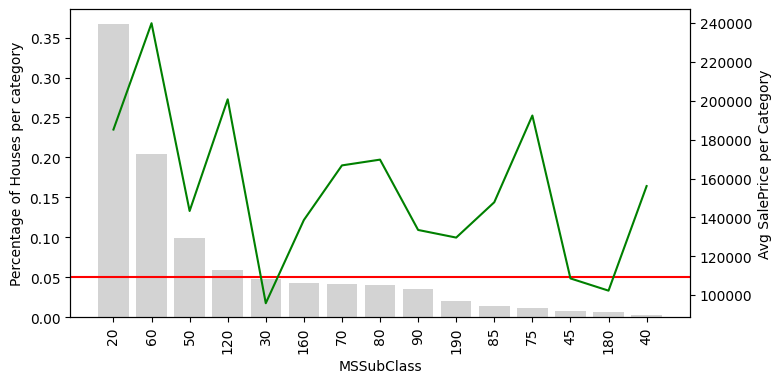

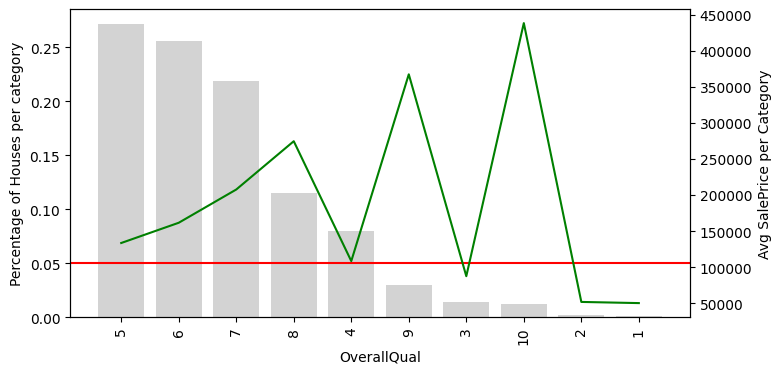

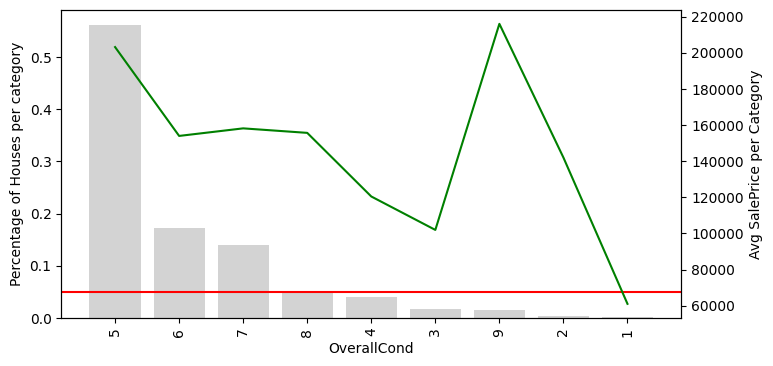

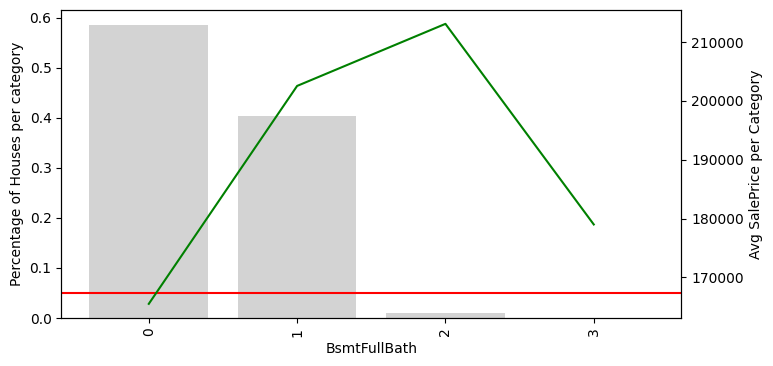

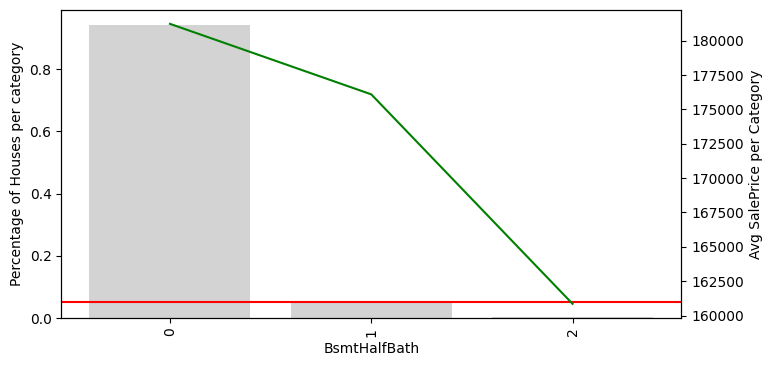

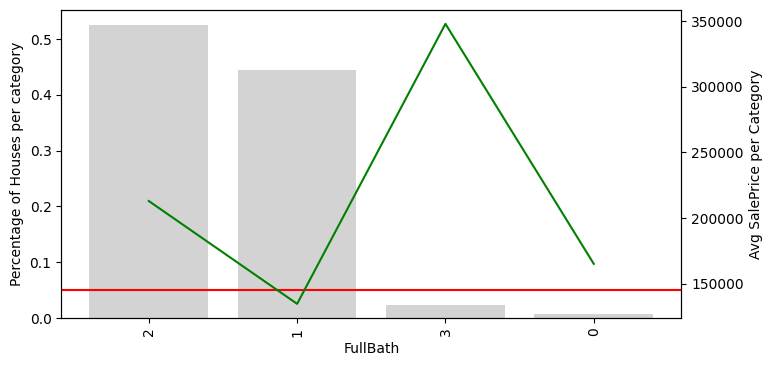

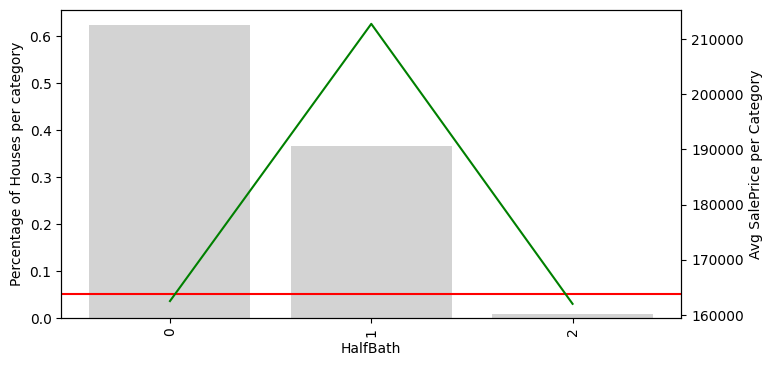

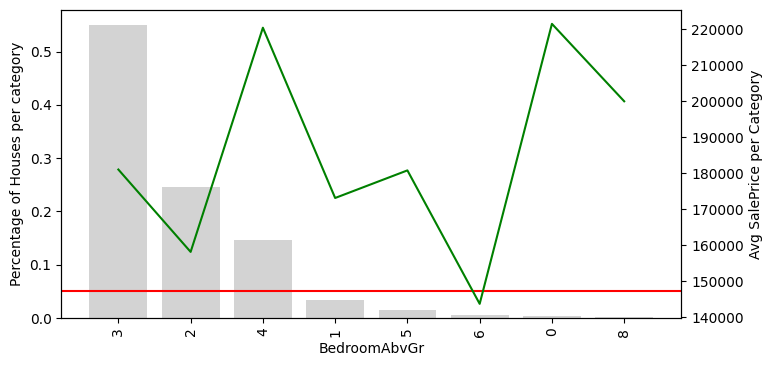

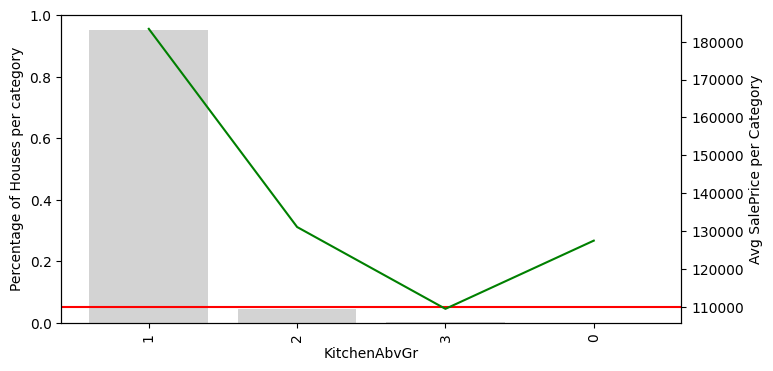

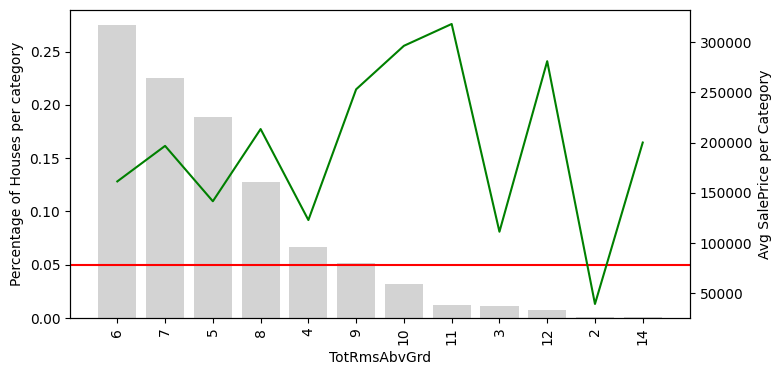

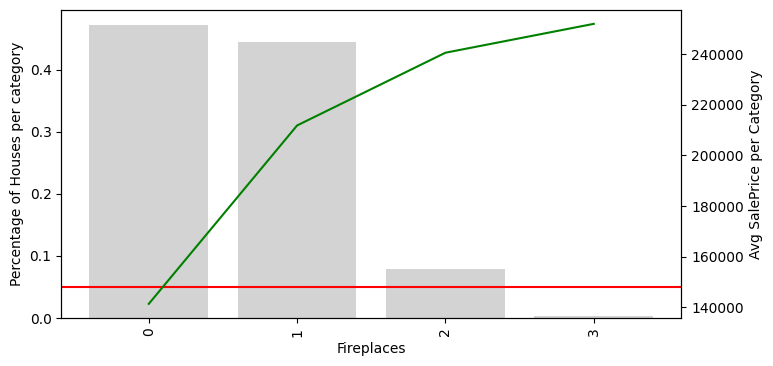

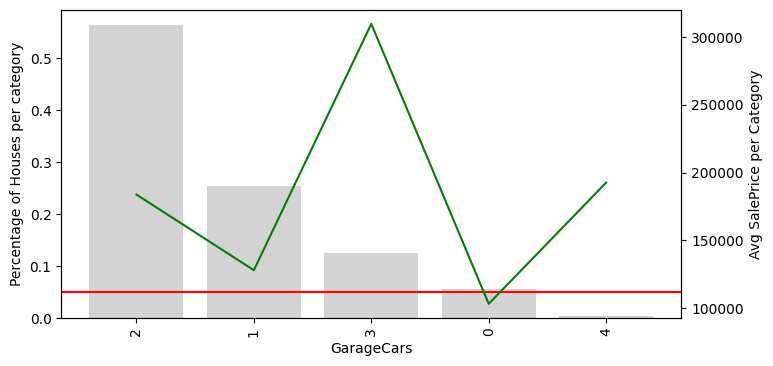

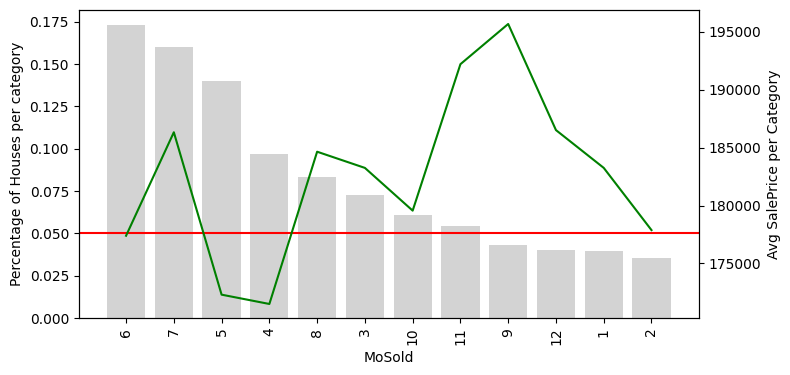

In [ ]:
# apply above functions to discrete_num variables

for var in discrete_num:
  temp_df = cal_mean_target_per_category(df, var)
  plot_categories(temp_df, var)

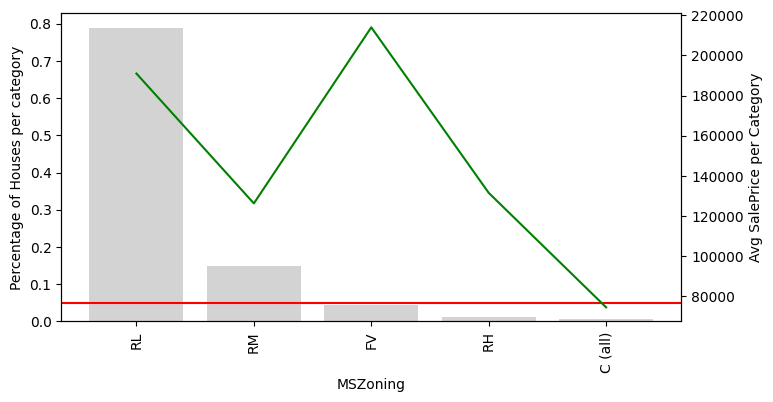

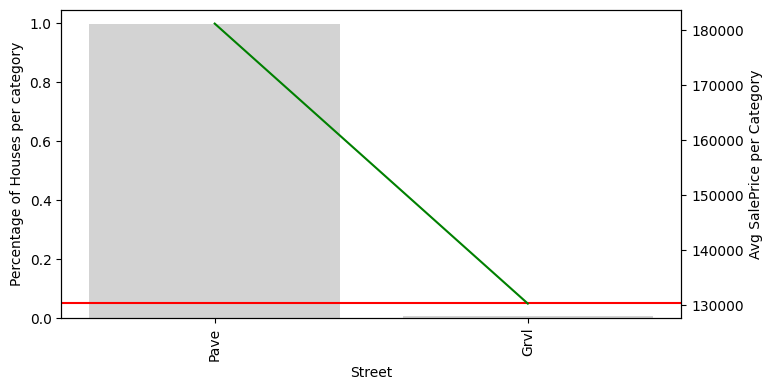

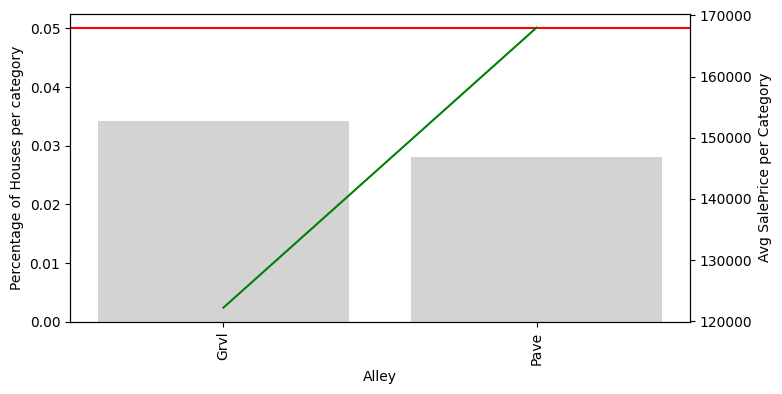

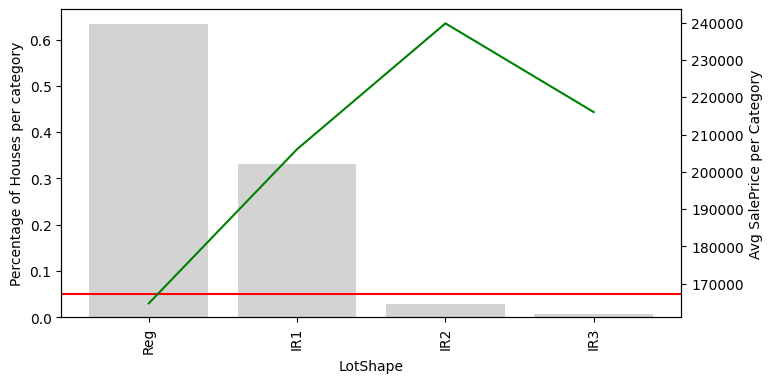

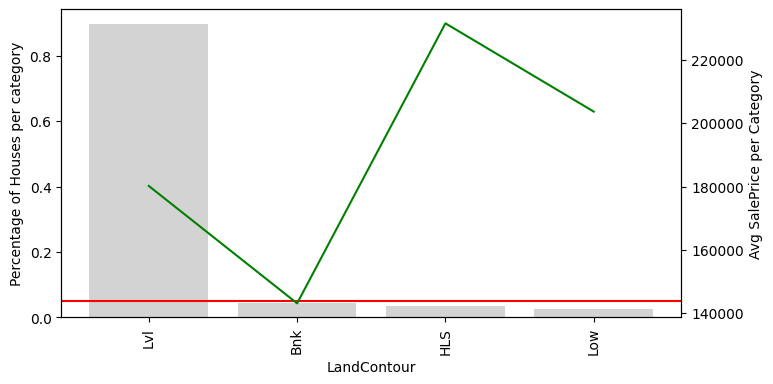

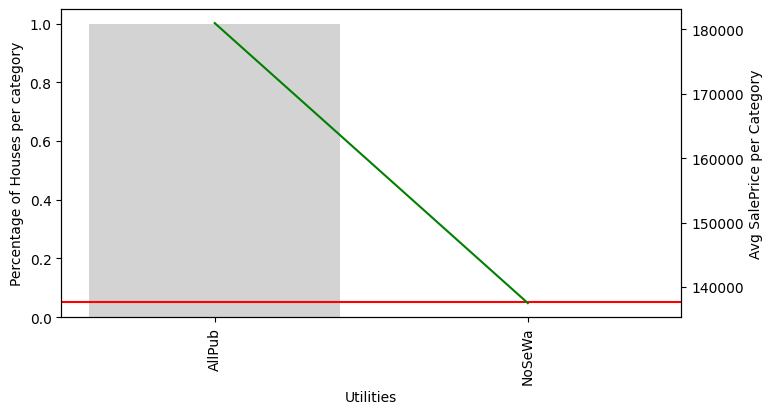

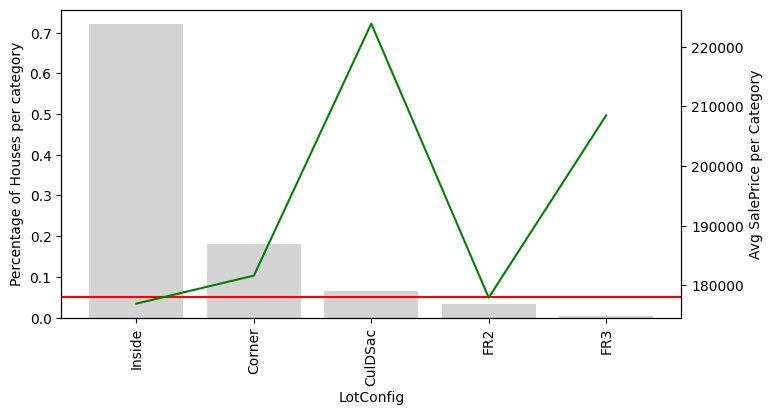

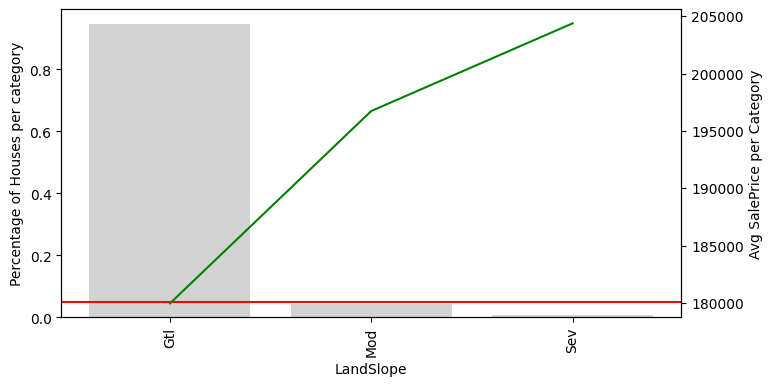

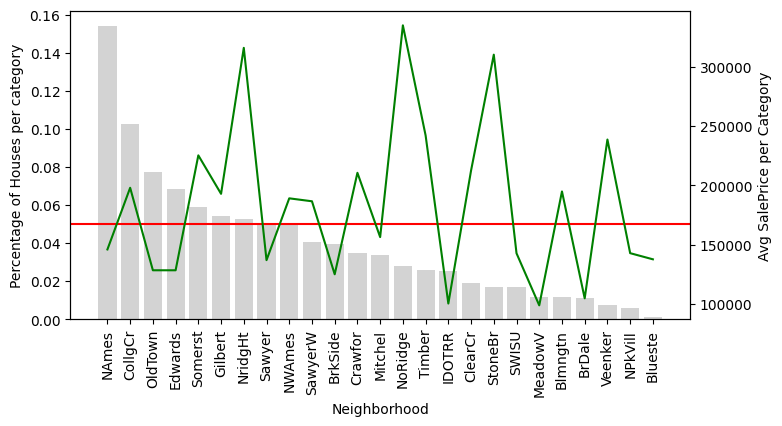

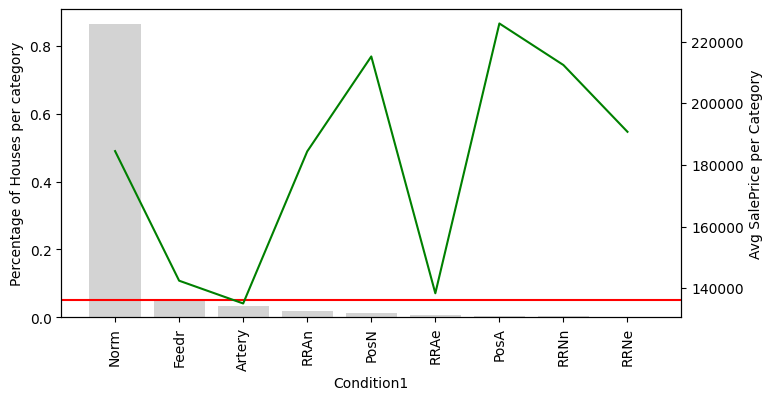

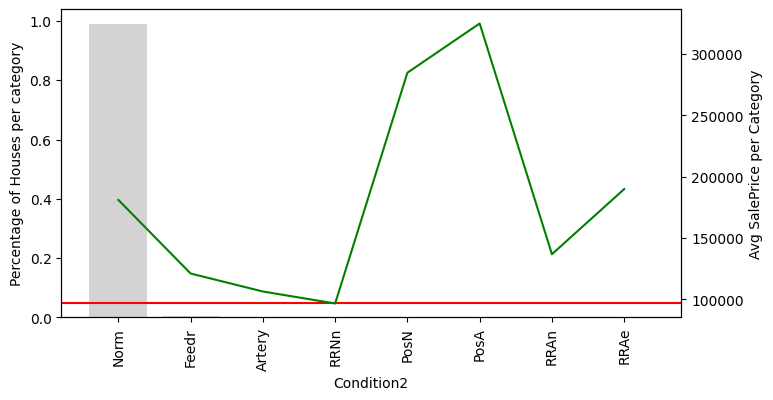

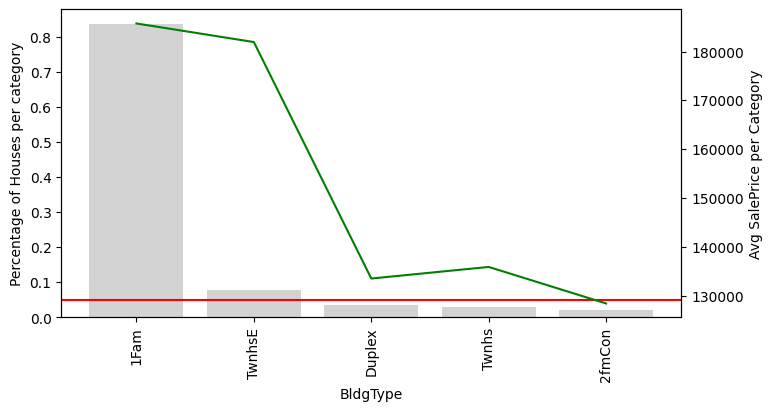

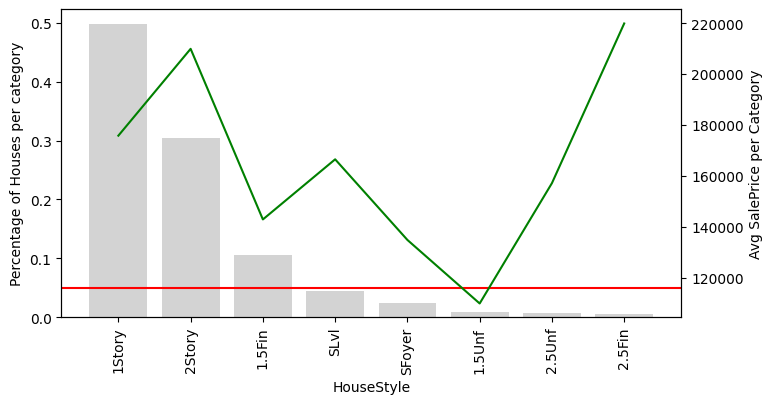

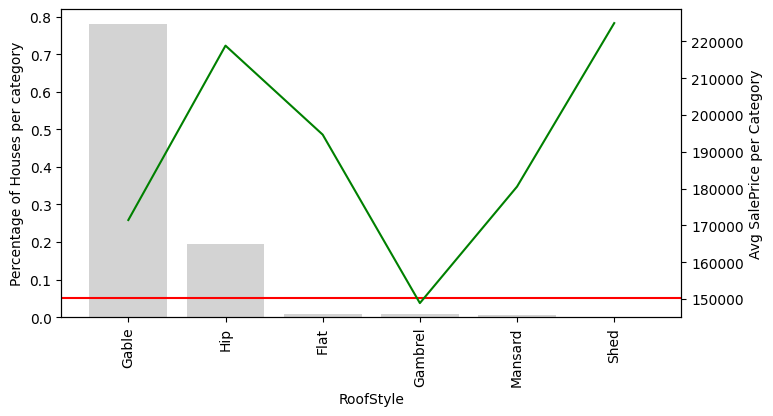

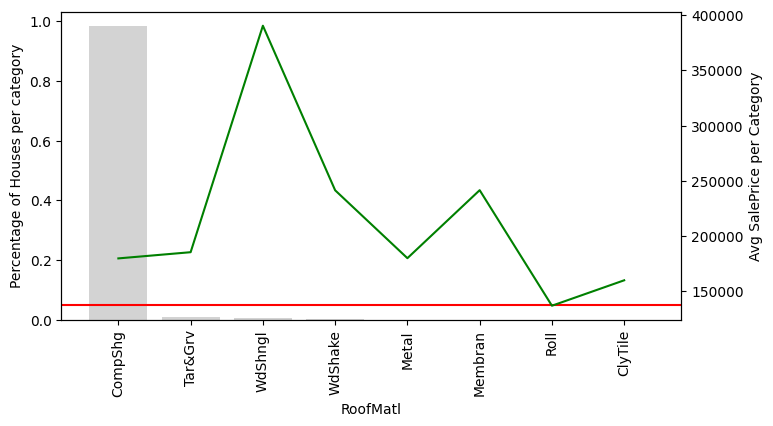

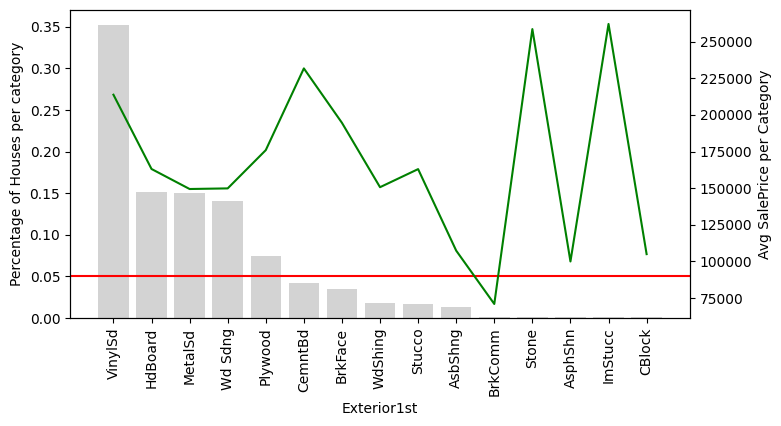

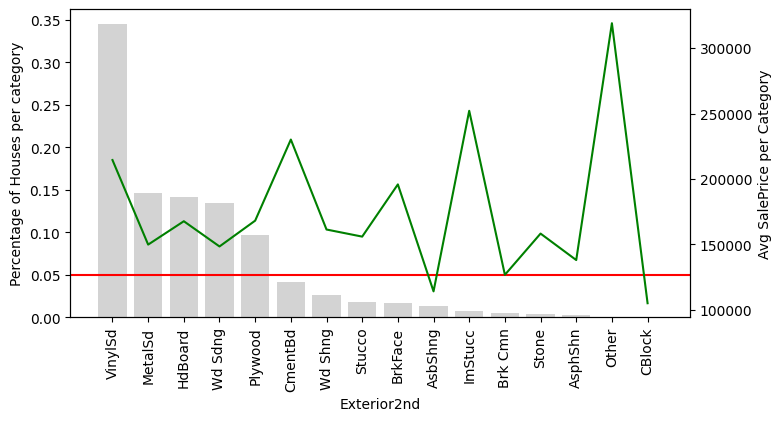

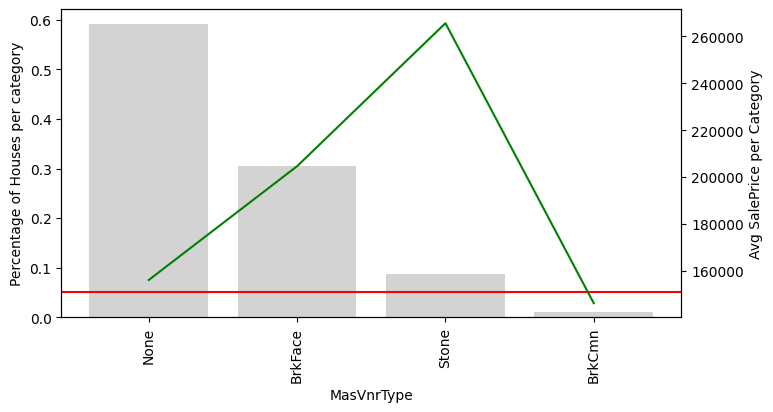

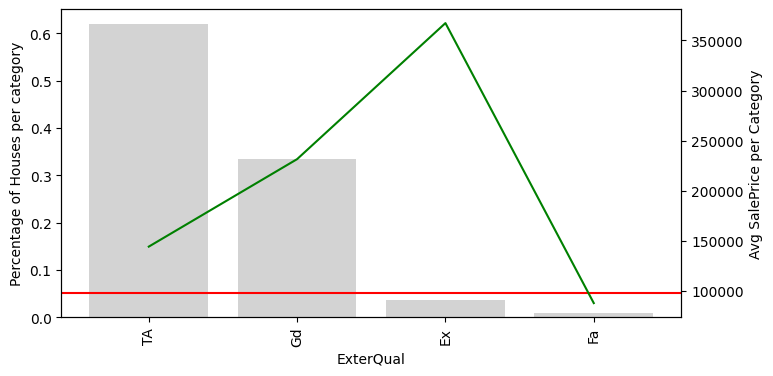

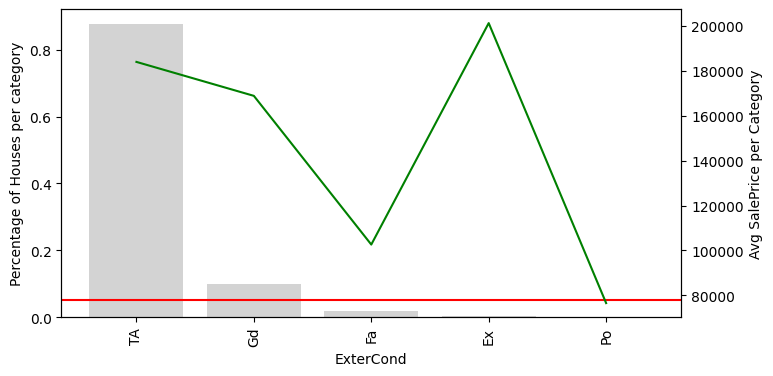

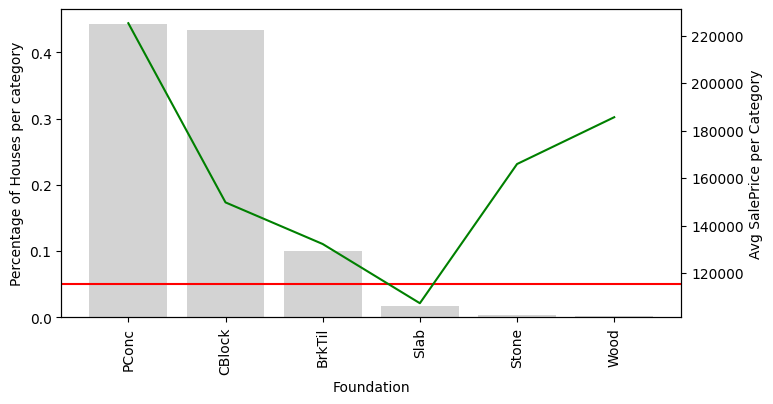

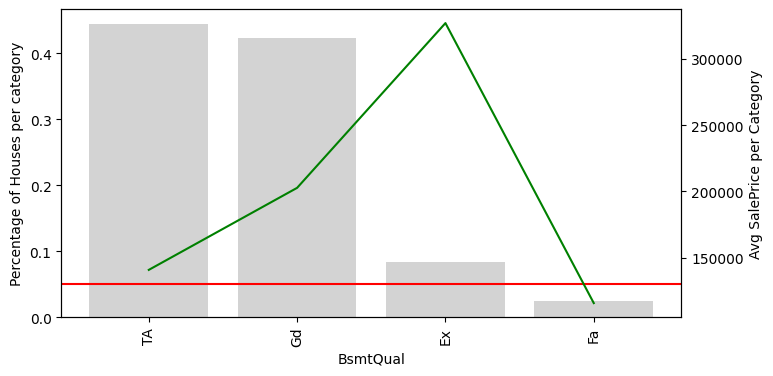

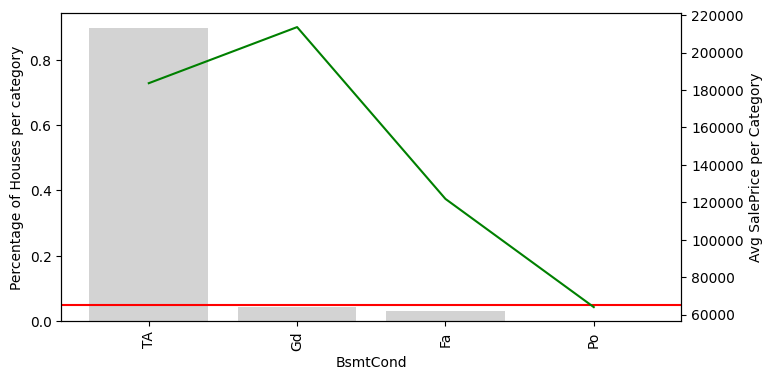

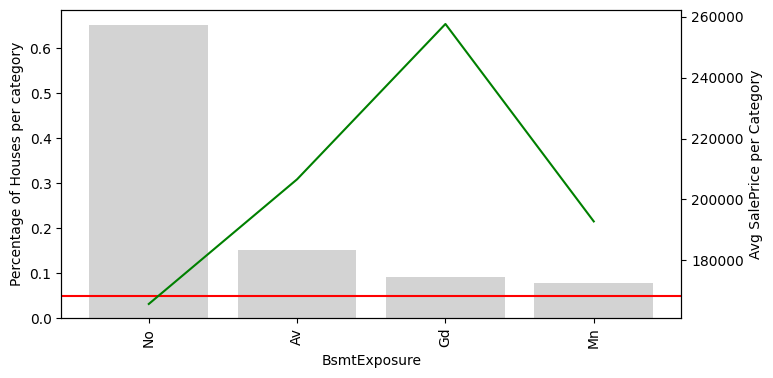

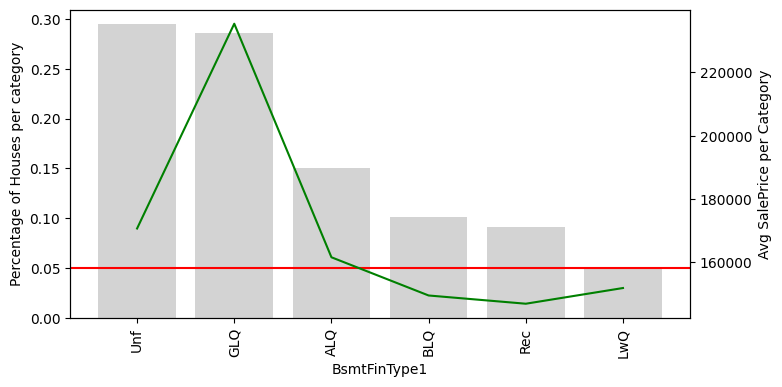

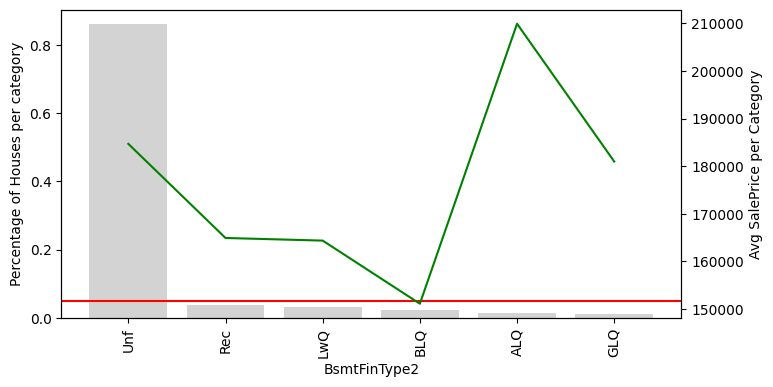

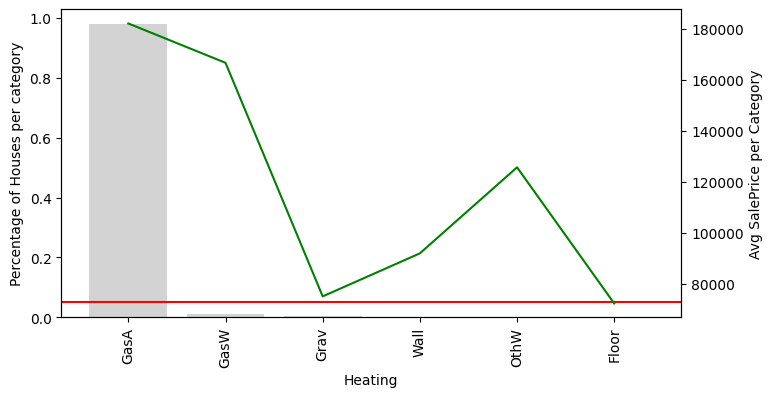

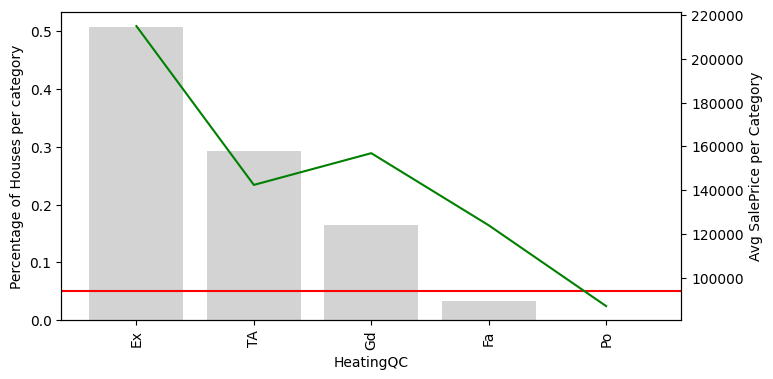

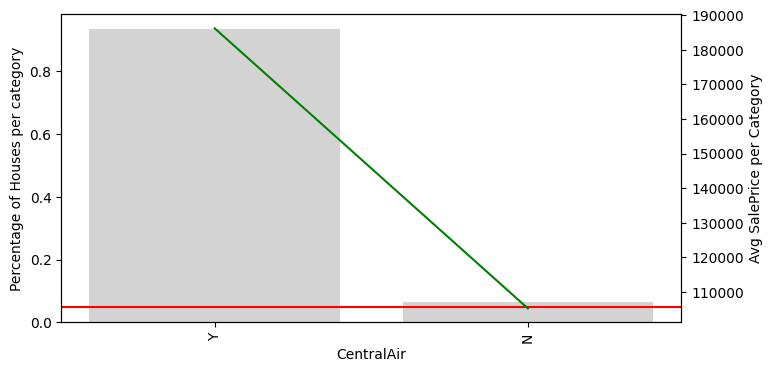

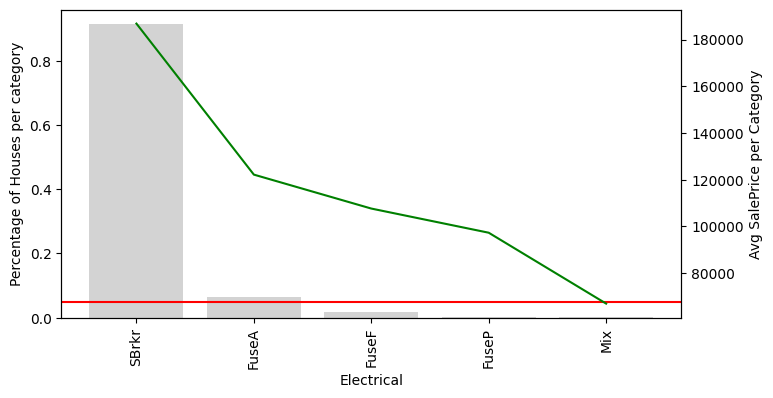

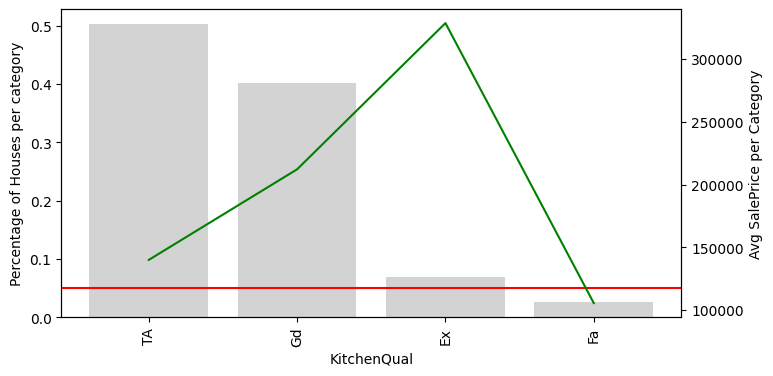

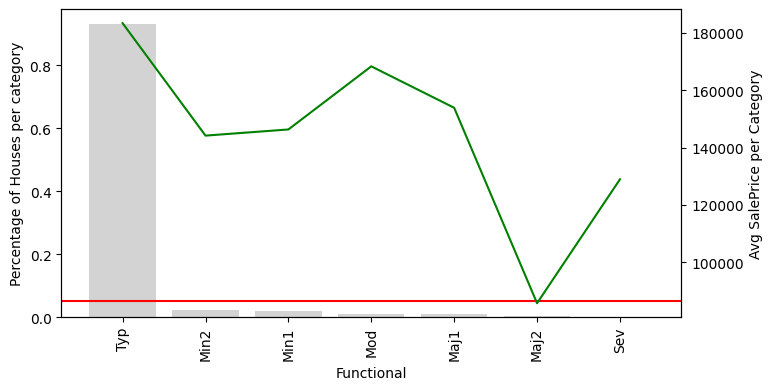

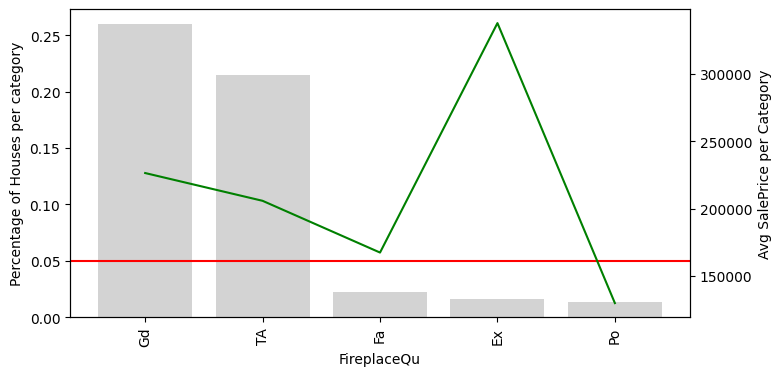

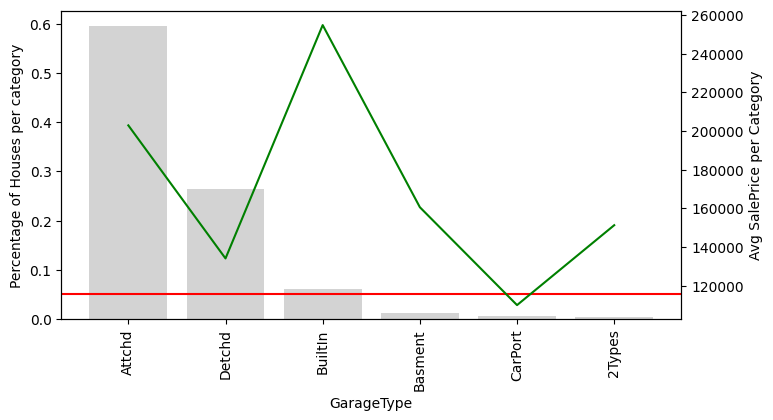

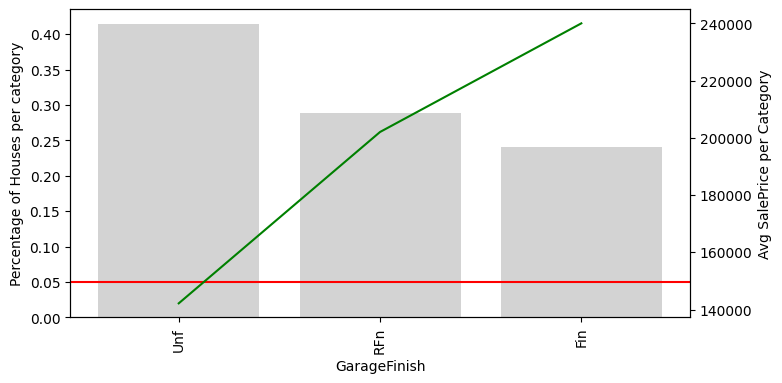

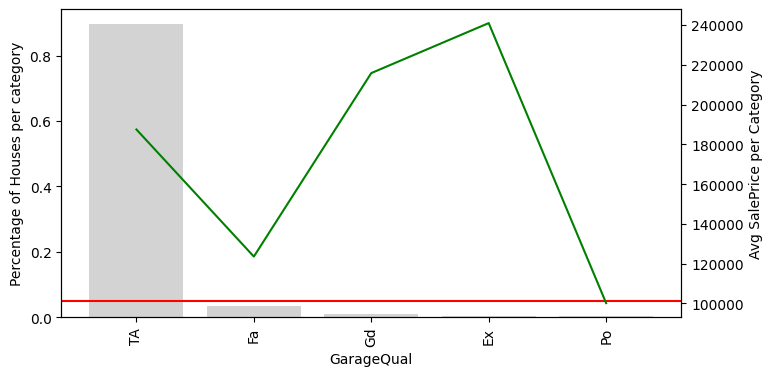

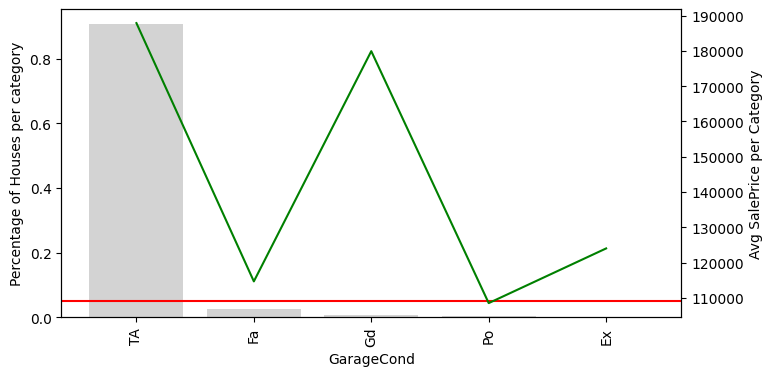

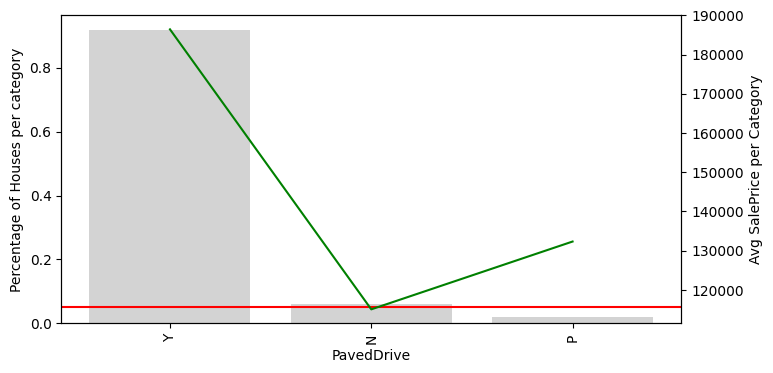

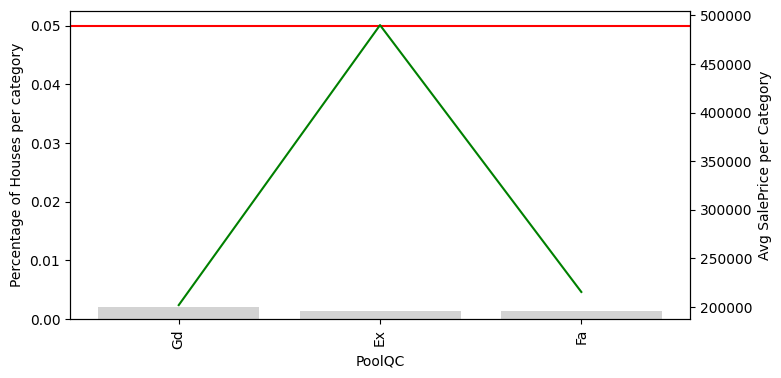

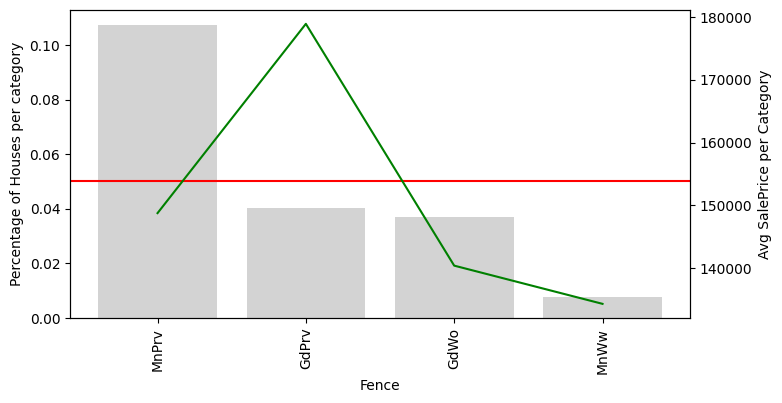

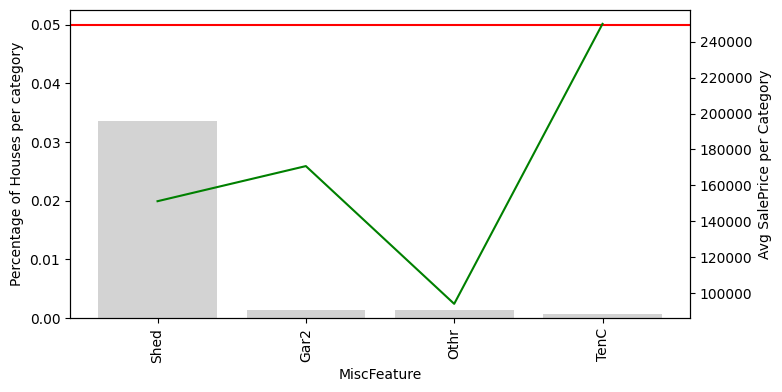

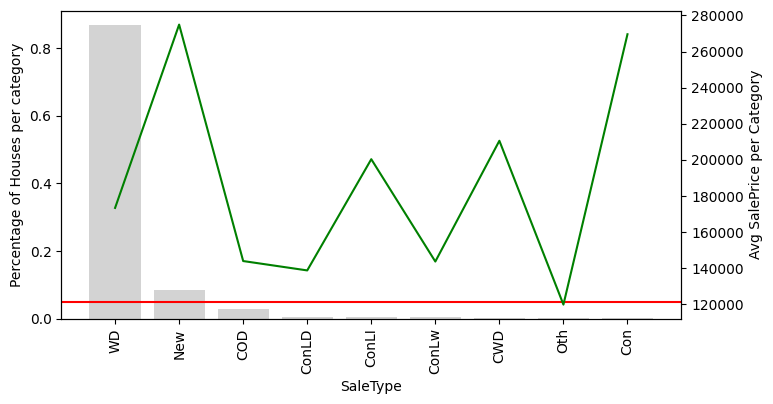

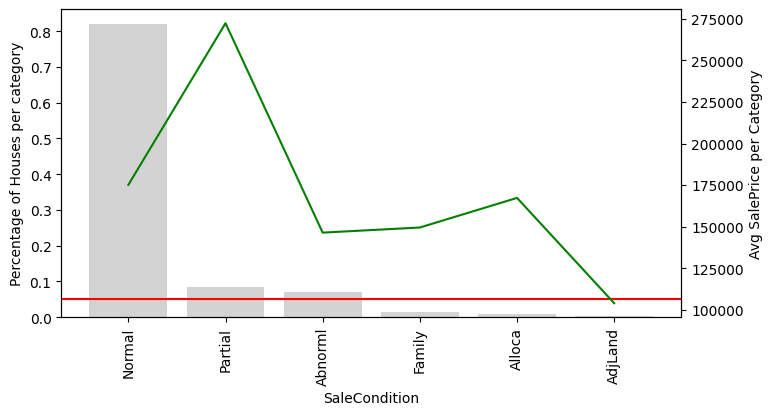

In [ ]:
# apply above functions to Categorical Variables 

for var in categorical:
  temp_df = cal_mean_target_per_category(df, var)
  plot_categories(temp_df, var)

<font face='comic sans ms'>

By observing all the plots above for both discrete numerical variables and Categorical variables, following are the <strong>observations</strong>:

*   Some of the variables are having high Cardinality.
*   In each plot we have some categories with less than 5% of houses per category. We will refer them as rare categories.
*   We can not trust the mean values of rare labels, as they are not backed by good amount of records.   
*   We could under or over-estimating the effect of each rare categories or high cardinal variables, and it may cause <strong>overfit</strong> and also <strong>operationalization problem</strong>.
*   To justify the mean "SalePrice" value, we must have good amount of records for that category.
* Hence, we need to handle such variables which has high cardinality and rare labels.

All the variables from year_var are having large number of unique categories except 'YrSold' variable, as it is having only 5 unique value counts. Lets visualise its plot with plot_categories() function. 

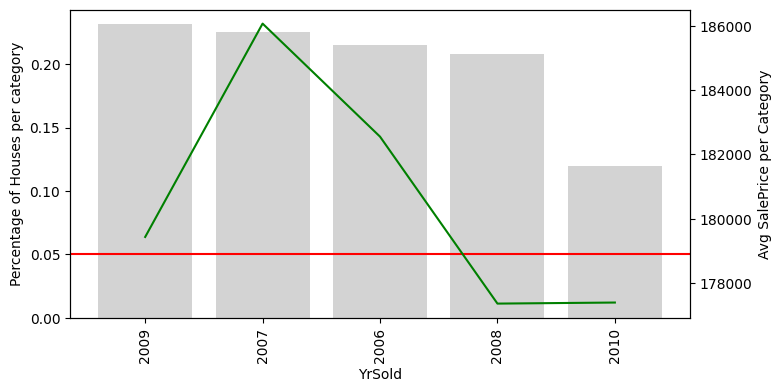

In [ ]:
# visualise 'YrSold' variable with plot_categories() function

temp_df = cal_mean_target_per_category(df, 'YrSold')
plot_categories(temp_df, 'YrSold')

<font face='comic sans ms'>

*   As 'YrSold' variable is having good amount of records for each of the categories and also it is not a cardinal variable.
*   mean SalePrice value obtained will be trust worthy for this variable.

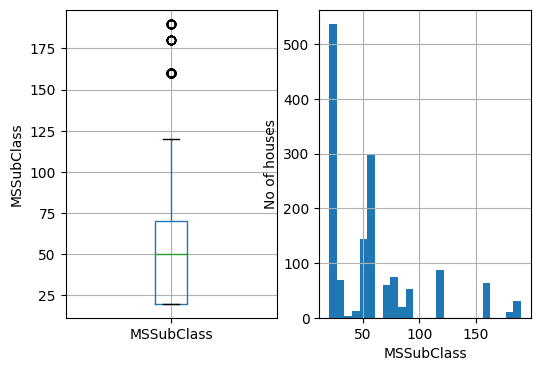

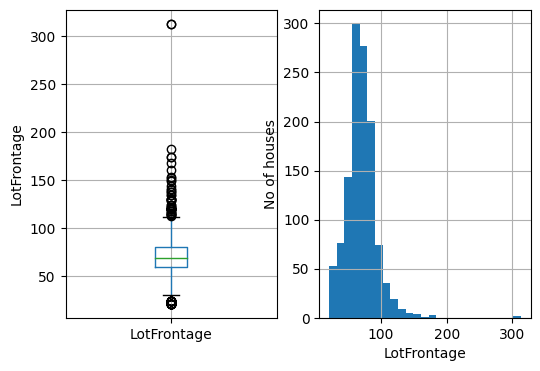

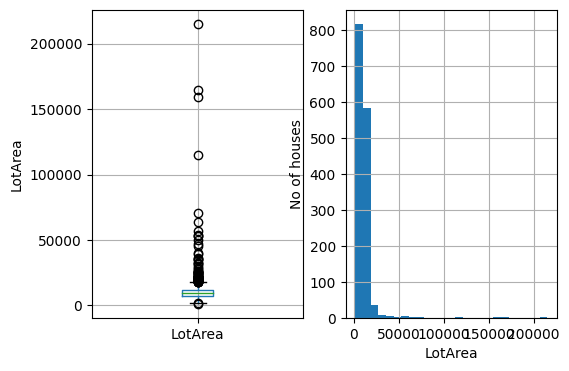

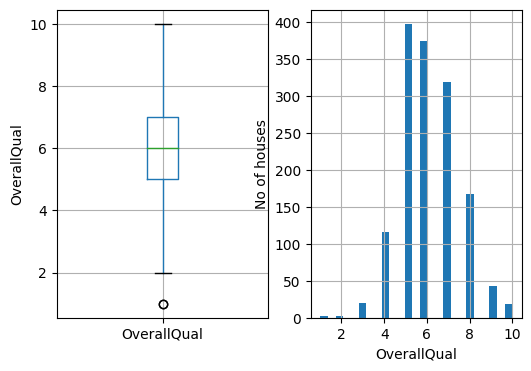

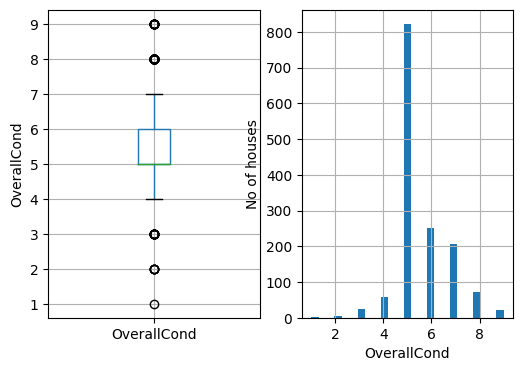

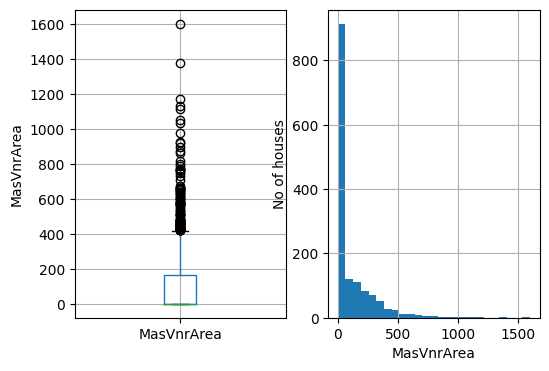

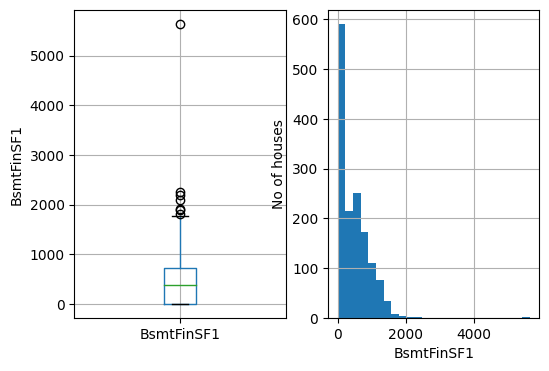

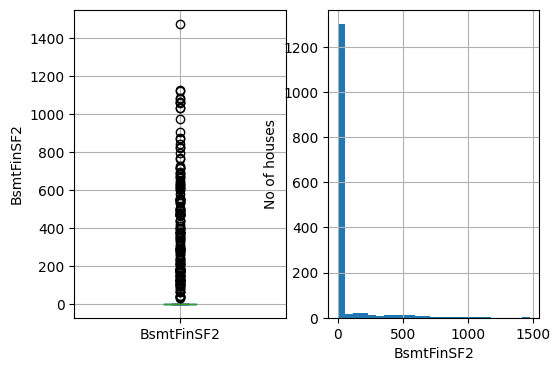

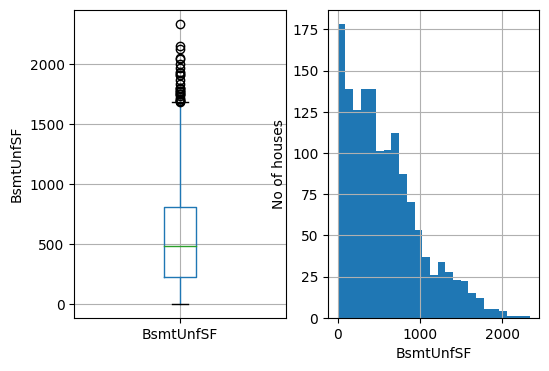

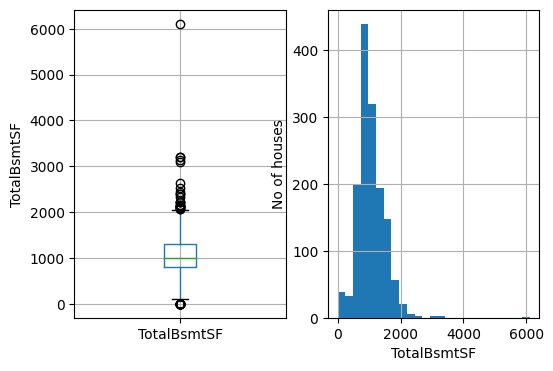

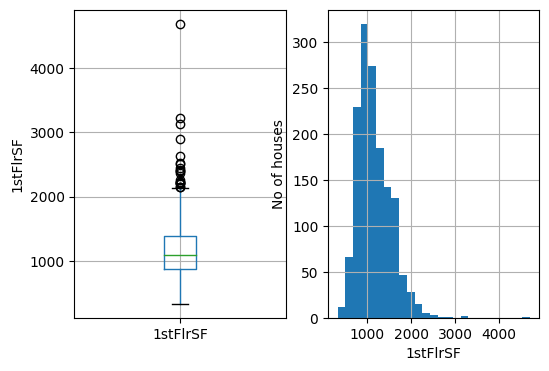

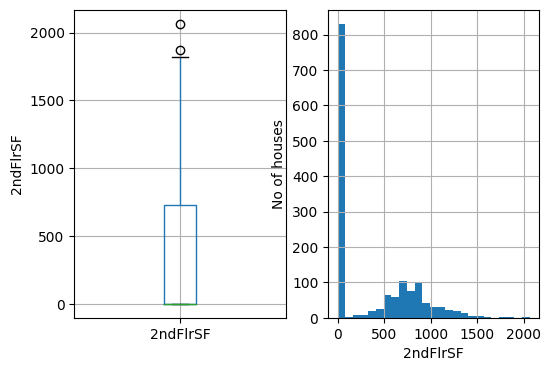

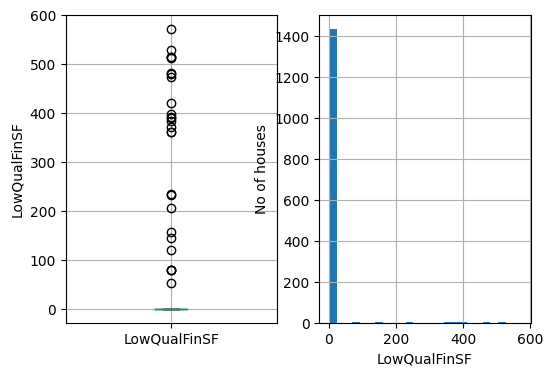

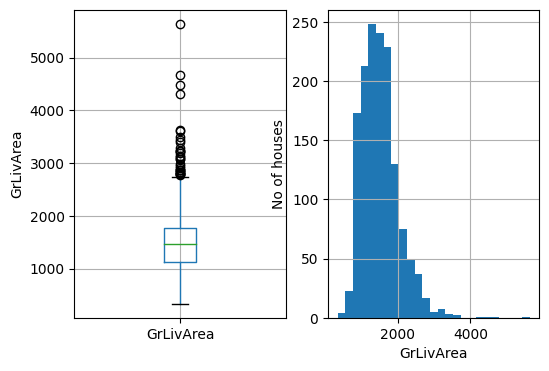

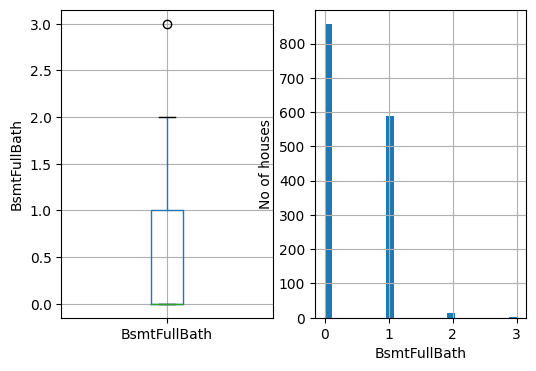

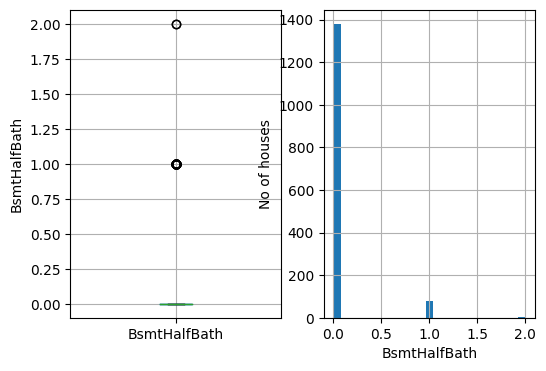

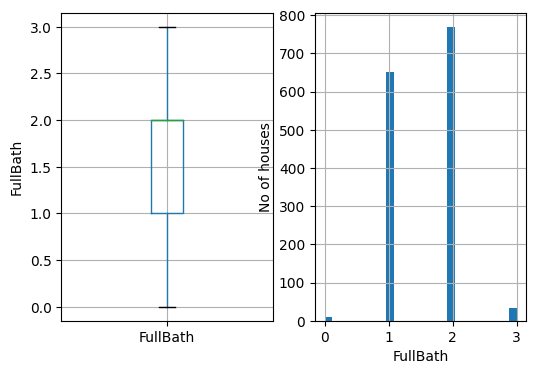

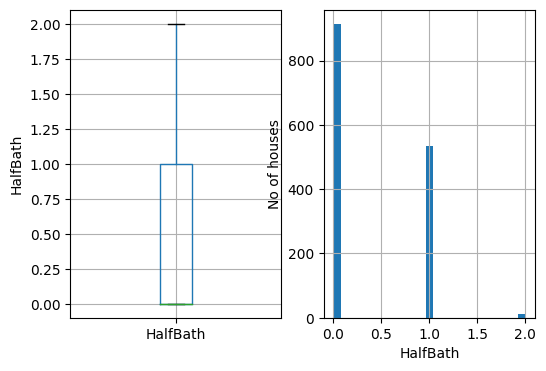

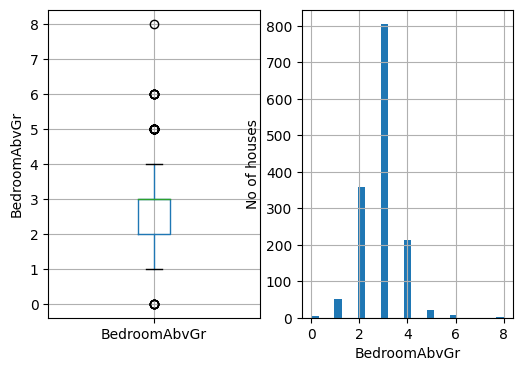

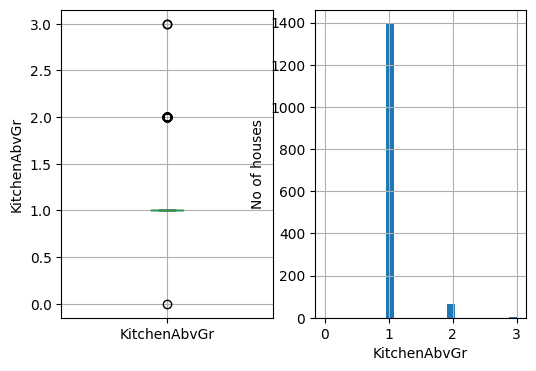

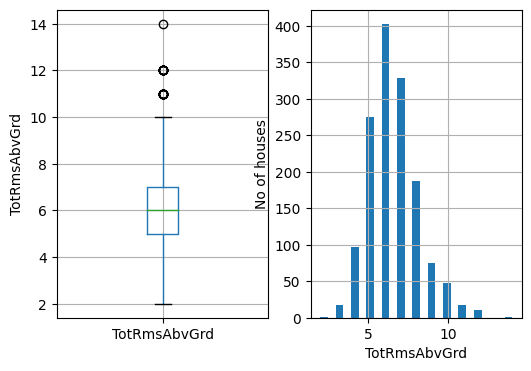

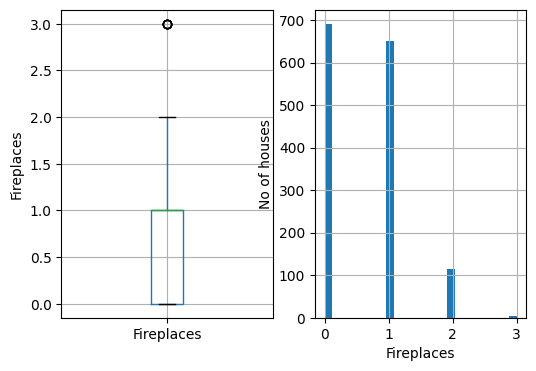

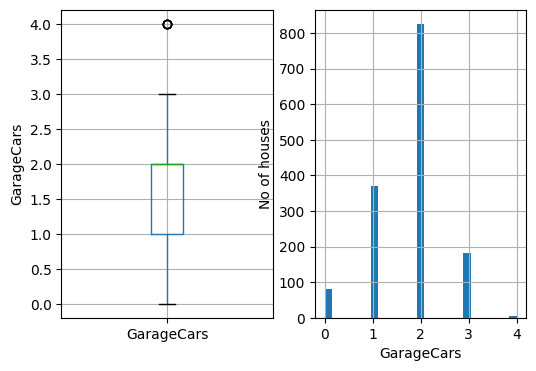

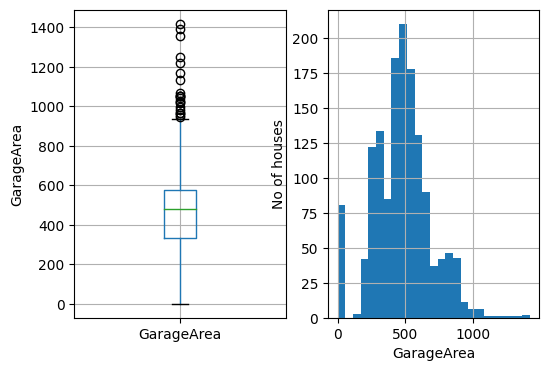

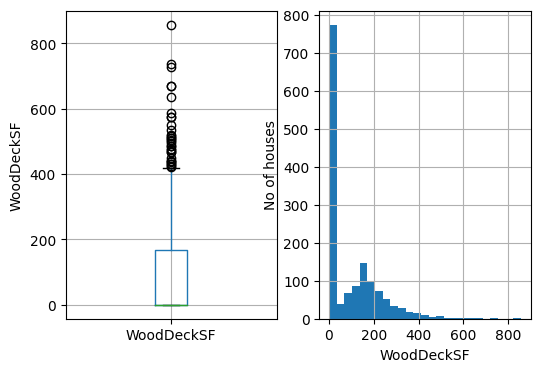

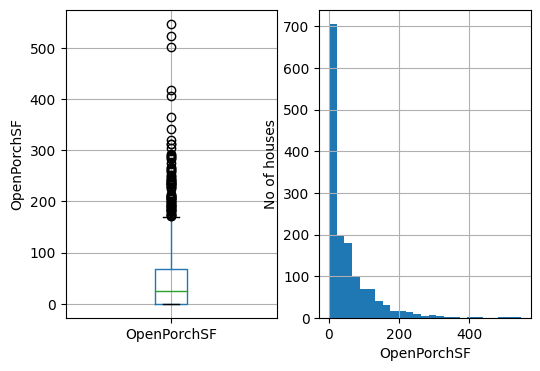

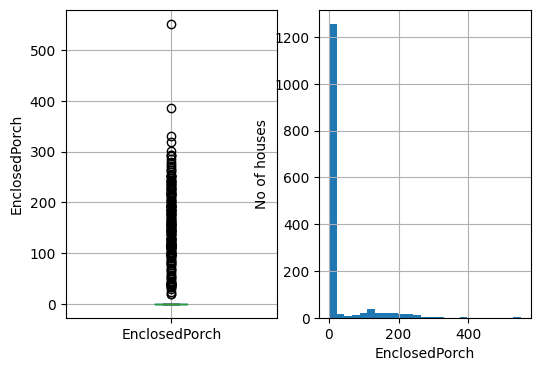

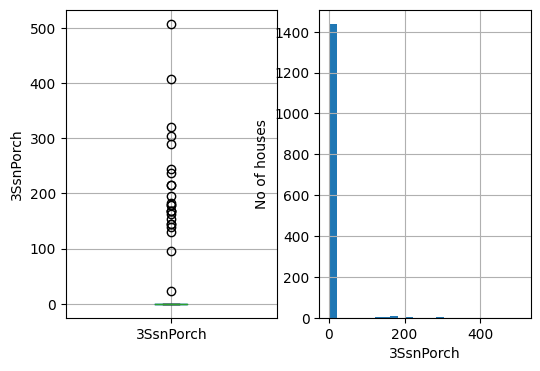

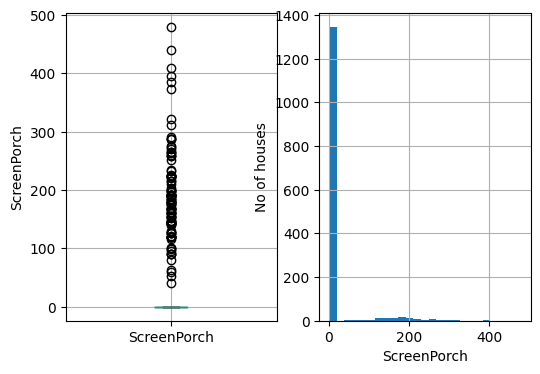

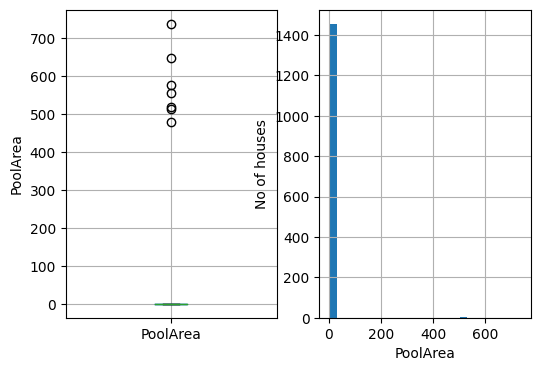

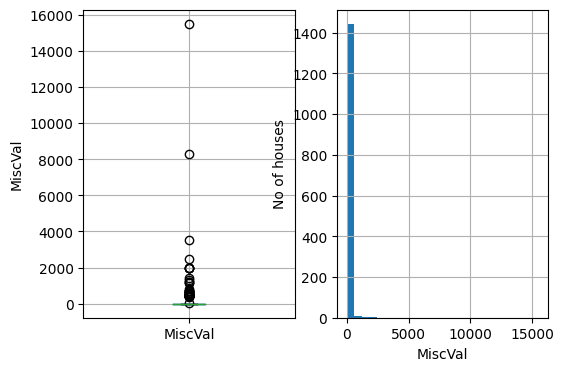

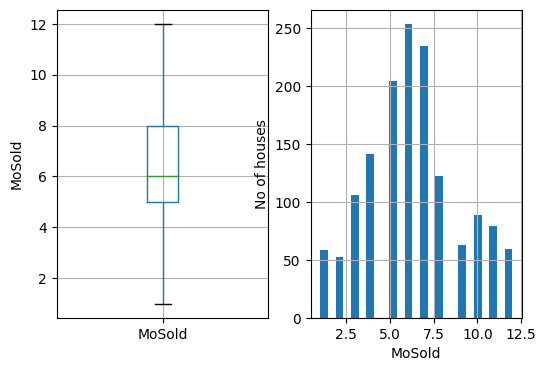

In [ ]:
# Now we will visualise distribution of Numerical Variables 
# By understanding distribution, we can decide method to identify the outliers and imputation strategy for missing data

for var in numerical:
  plt.figure(figsize=(6,4))
  plt.subplot(1,2,1)
  fig = df.boxplot(column=var)
  fig.set_title('')
  fig.set_ylabel(var)

  plt.subplot(1,2,2)
  fig = df[var].hist(bins=25)
  fig.set_xlabel(var)
  fig.set_ylabel('No of houses')

  plt.show()

<font face='comic sans ms'>

*    All the numerical variables are not Normally distributed, and
*    Majority of the variables contains large number of outliers, <br>
Viz. "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "LowQualFinSF", "GrLivArea", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch" "ScreenPorch", "MiscVal", "PoolArea"

We need to handle this outliers as it may impact model performance badly. To tackle these two aspects together I will do discretisation with encoding of intervals following the target mean. 

<font face='comic sans ms'><h4><strong>Discrete Variables can be treate/ Engineered as if they were categorical variables.

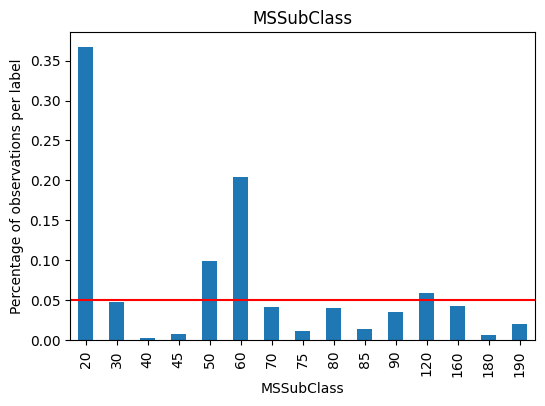

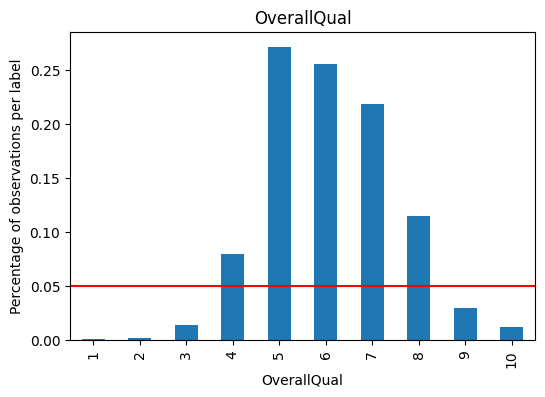

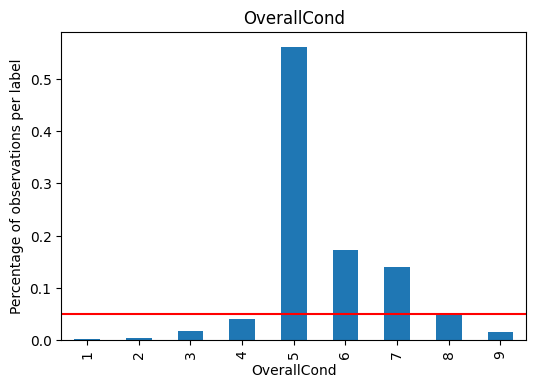

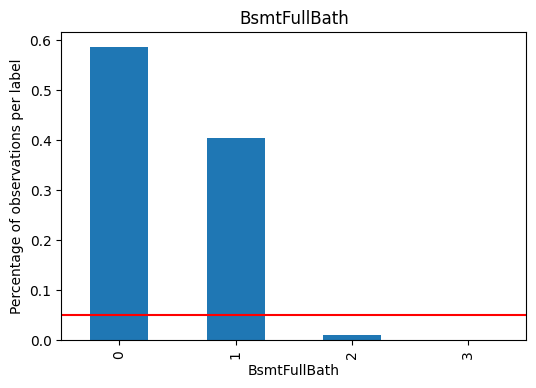

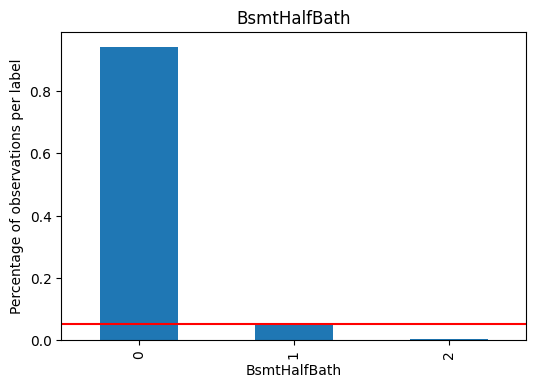

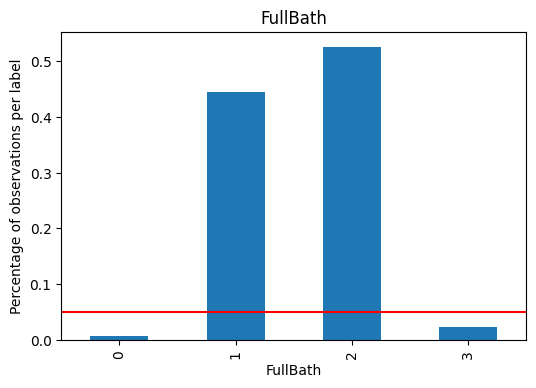

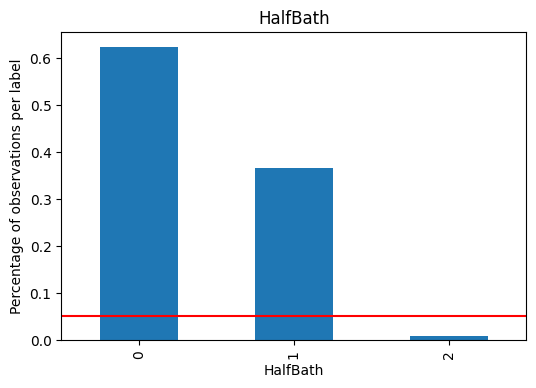

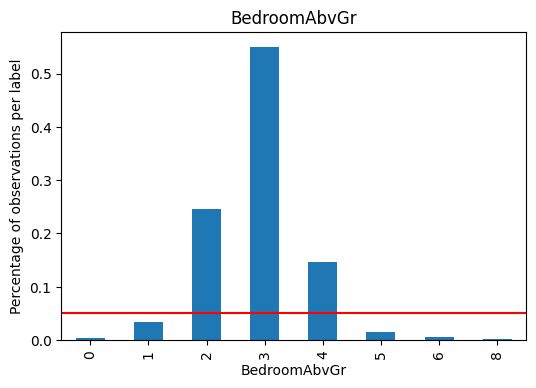

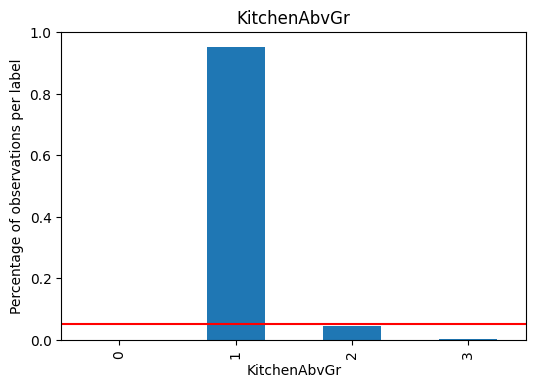

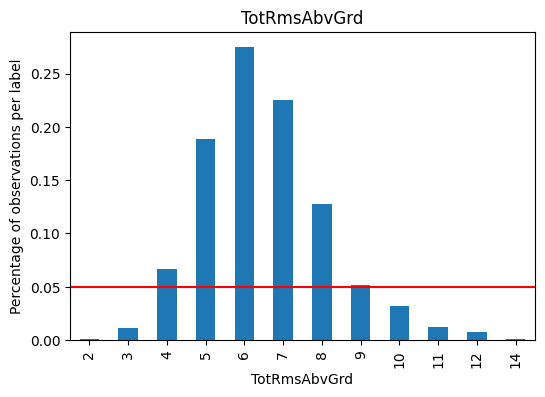

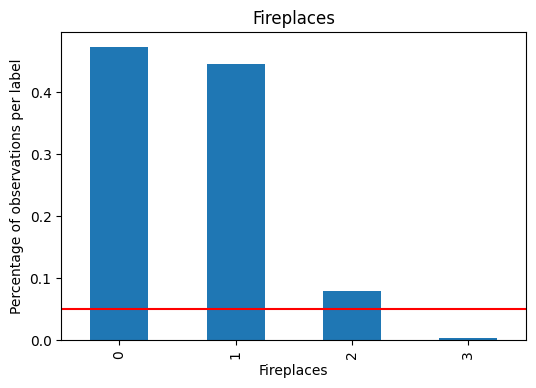

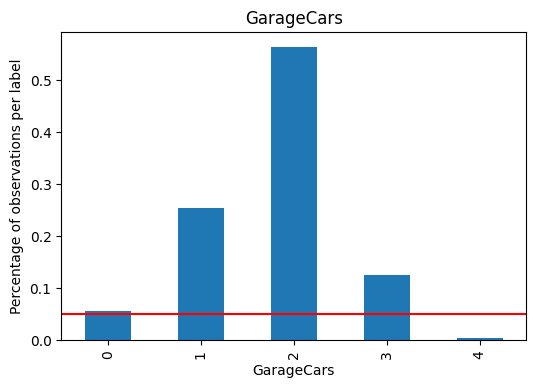

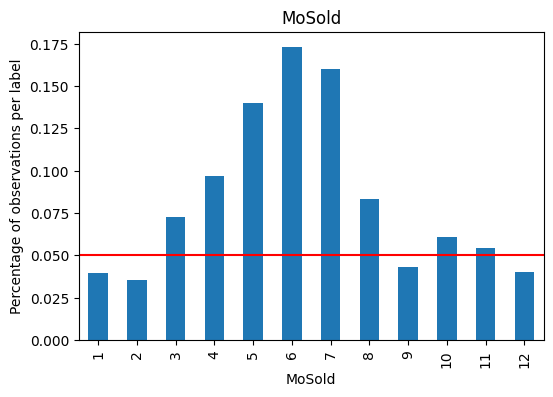

In [ ]:
# Now lets inspect discrete variables for outliers.
# here I will call those values that are present in less than 5% of houses

for var in discrete_num:
  fig, ax = plt.subplots(figsize=(6,4))
  (df.groupby(var)[var].count() / np.float(len(df))).plot.bar()
  ax.axhline(y=0.05, color='red')
  plt.title(var)
  plt.ylabel("Percentage of observations per label")
  plt.show()

<font face='comic sans ms'>

*    Most of the variables has outlier values.

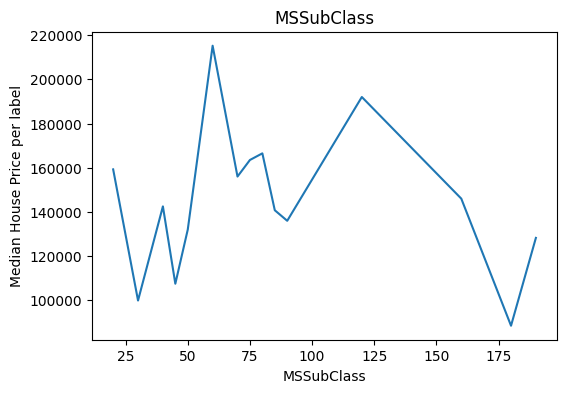

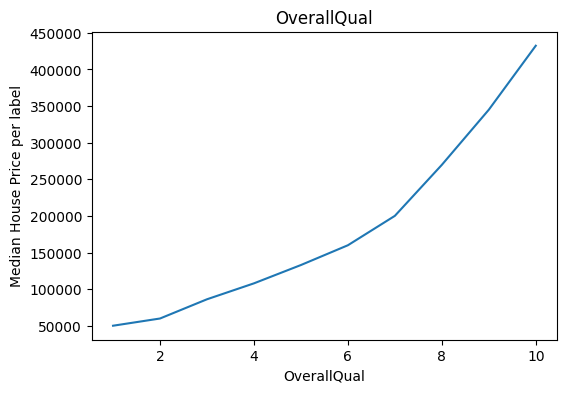

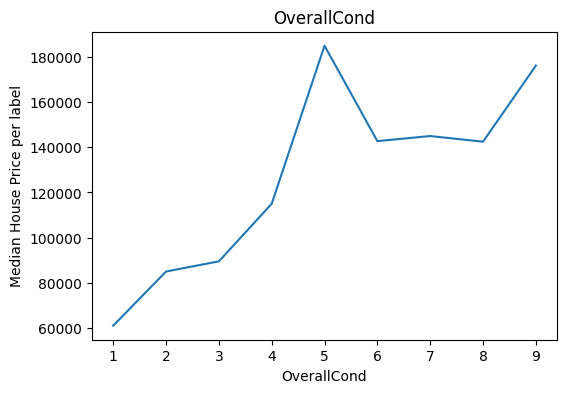

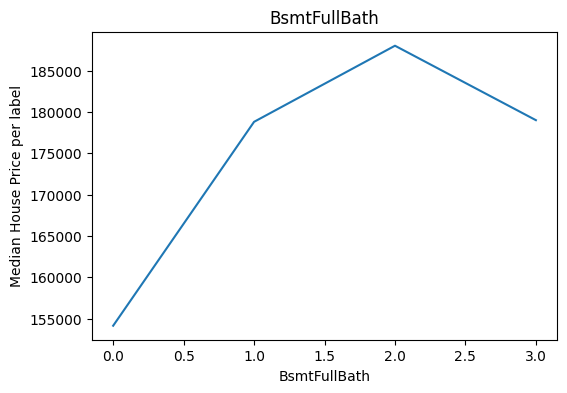

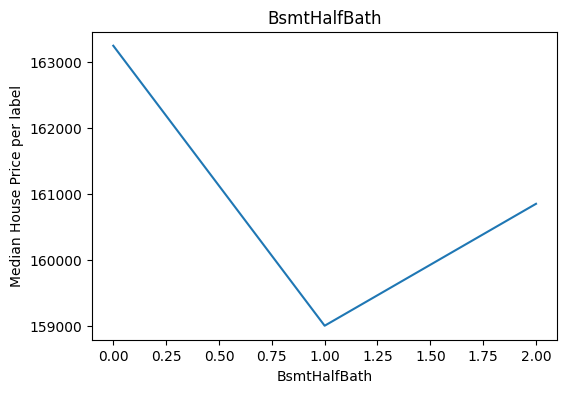

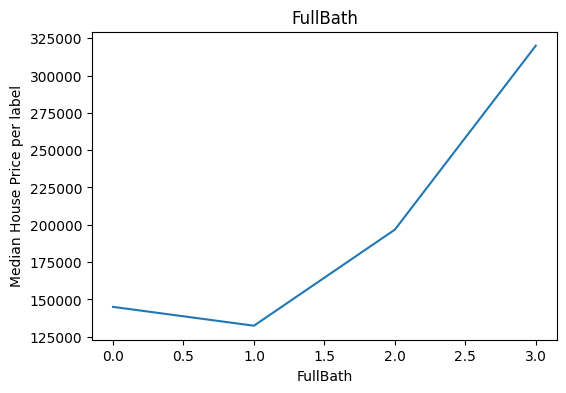

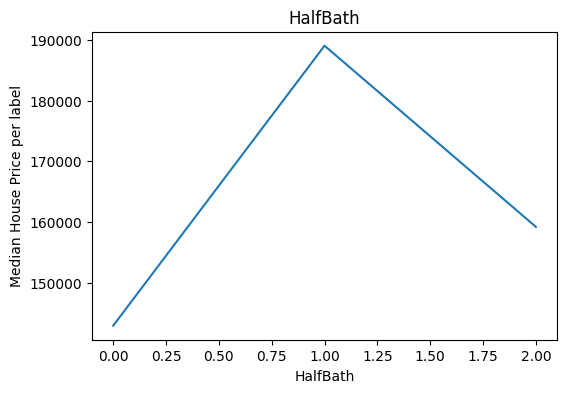

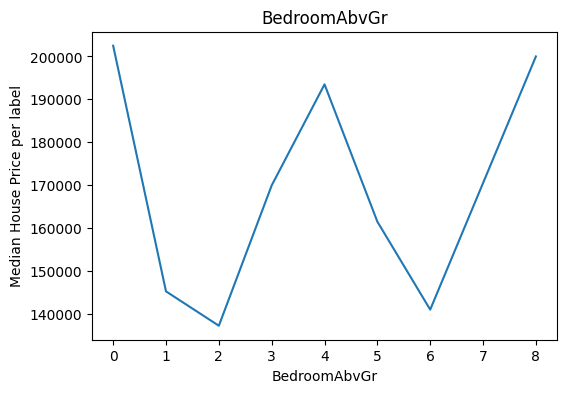

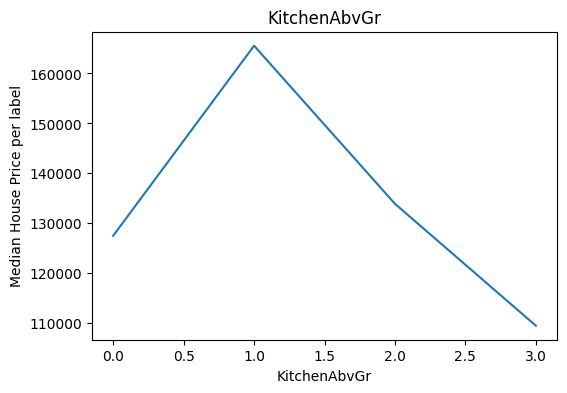

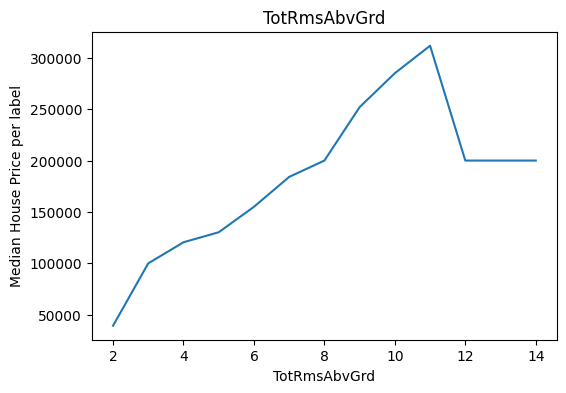

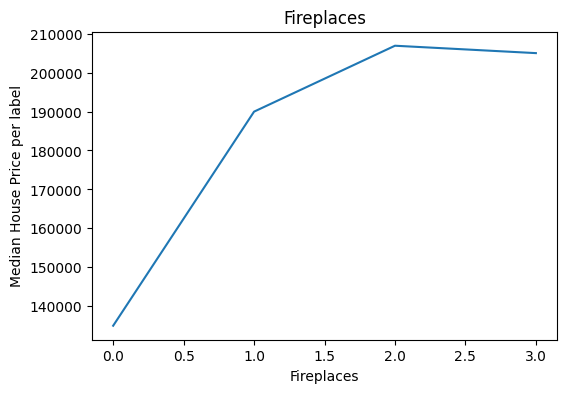

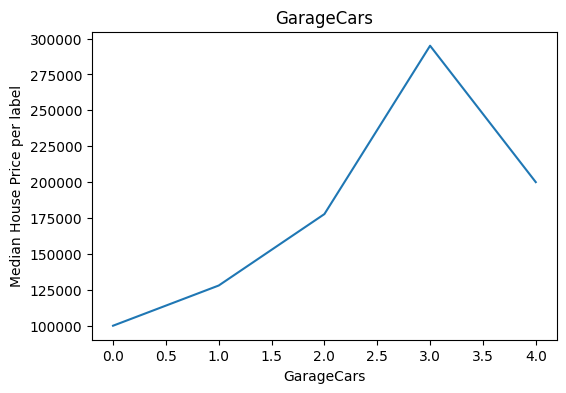

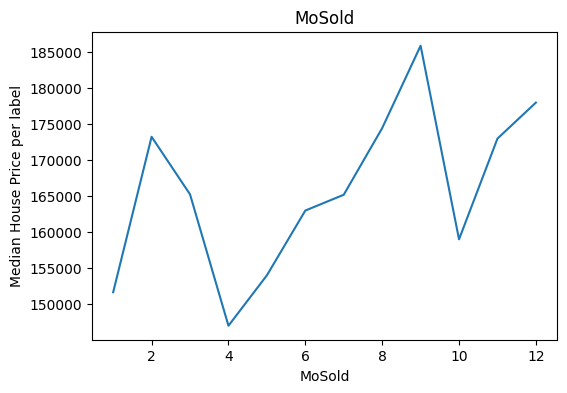

In [ ]:
# Lets visualise Monotonicity between discrete variables and target varable

for var in discrete_num:
  plt.figure(figsize=(6,4))
  df.groupby(var)['SalePrice'].median().plot()
  plt.ylabel("Median House Price per label")
  plt.title(var)
  plt.show()

<font face='comic sans ms'>

*    Above plots shows that some of the variables has monotonic relation ship with target variable, but some of the variables don't. 

<h3><font face='Comic Sans MS' color='darkblue'><strong>Split Dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop([ 'SalePrice'], axis=1), 
                                                    df['SalePrice'], 
                                                    test_size=0.1, 
                                                    random_state=0)        

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1314, 80), (1314,), (146, 80), (146,))

In [ ]:
# load unseen test dataset

test_df = pd.read_csv('/content/test.csv')

In [ ]:
ids = test_df['Id'].values          # save this for future use

<h3><font face='Comic Sans MS' color='darkblue'><strong>Feature Enginnering

<font face='comic sans ms'>

<strong>Feature Engineering #01</strong> Extract useful information from all the Year Variables

For the temporal data lets create a function to calcualte time elapsed between 'YrSold' and 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt'

In [ ]:
def time_elapsed(data, var):
  """
  This function takes dataset and variables list and calculates and replaces the values of the corresponding variables
  by the time elapsed till the house has been sold.
  """

  data[var] = data['YrSold'] - data[var]
  
  return data

In [ ]:
year_var

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [ ]:
def transform_df(data, discrete_features=discrete_num):
  """
  this function will take dataset as it is provided from competition and transform it in such a way that 
  grid_search variable accept it and make prediction.
  """

  for var in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    data = time_elapsed(data, var)

  # we will drop 'YrSold' variable as we have already extracted its value from it.
  data.drop(['Id', 'YrSold'], axis=1, inplace=True)

  return data

In [ ]:
X_train = transform_df(X_train)
X_test = transform_df(X_test)
test_df = transform_df(test_df)

<font face='comic sans ms'>

Now instead of year we have amount of year that has passed since this house was built, remodeled and sold.

Next, we will drop 'YrSold' variable as we have already extracted its value.

In [ ]:
# remove 'YrSold' from year_var

year_var.remove('YrSold')

In [ ]:
X_train[year_var].head()

YearBuilt  YearRemodAdd  GarageYrBlt
930           2             2          2.0
656          49             2         49.0
45            5             5          5.0
1348          9             9          9.0
55           44            44         44.0

In [ ]:
final_columns = X_train.columns

<font face='comic sans ms'>

<strong>Feature Engineering #02</strong> Missing Value Imputation

In [ ]:
# first examine the numerical and temporal variables for missing value percentage 

for var in numerical + year_var:
  if X_train[var].isnull().mean() > 0:
    print("{} {}".format(var, X_train[var].isnull().mean()))

LotFrontage 0.17732115677321156
MasVnrArea 0.0045662100456621
GarageYrBlt 0.0563165905631659


<font face='comic sans ms'>

We will use imputation technique : <strong>Additional variable with NA + Median imputation</strong> for numerical variables 

In [ ]:
# Now lets get the categorical variables which is missing value percentage more than 0 

for var in categorical:
  if X_train[var].isnull().mean() > 0:
    print(var, X_train[var].isnull().mean())

Alley 0.9383561643835616
MasVnrType 0.0045662100456621
BsmtQual 0.0243531202435312
BsmtCond 0.0243531202435312
BsmtExposure 0.02511415525114155
BsmtFinType1 0.0243531202435312
BsmtFinType2 0.02511415525114155
Electrical 0.00076103500761035
FireplaceQu 0.4726027397260274
GarageType 0.0563165905631659
GarageFinish 0.0563165905631659
GarageQual 0.0563165905631659
GarageCond 0.0563165905631659
PoolQC 0.9954337899543378
Fence 0.8143074581430746
MiscFeature 0.9611872146118722


<font face='comic sans ms'>

we will use imputation technique : <strong>Add missing label to categorical variables</strong>


Now we will <strong>check null variables of unseen test dataset</strong>.    

In [ ]:
# first examine the numerical and temporal variables for missing value percentage 
for var in numerical + year_var:
  if test_df[var].isnull().mean() > 0:
    print("{} {}".format(var, test_df[var].isnull().mean()))


LotFrontage 0.15558601782042494
MasVnrArea 0.01028101439342015
BsmtFinSF1 0.0006854009595613434
BsmtFinSF2 0.0006854009595613434
BsmtUnfSF 0.0006854009595613434
TotalBsmtSF 0.0006854009595613434
BsmtFullBath 0.0013708019191226869
BsmtHalfBath 0.0013708019191226869
GarageCars 0.0006854009595613434
GarageArea 0.0006854009595613434
GarageYrBlt 0.053461274845784786


In [ ]:
for var in categorical:
  if test_df[var].isnull().mean() > 0:
    print(var, test_df[var].isnull().mean())

MSZoning 0.0027416038382453737
Alley 0.9266620973269363
Utilities 0.0013708019191226869
Exterior1st 0.0006854009595613434
Exterior2nd 0.0006854009595613434
MasVnrType 0.010966415352981495
BsmtQual 0.03015764222069911
BsmtCond 0.030843043180260453
BsmtExposure 0.03015764222069911
BsmtFinType1 0.02878684030157642
BsmtFinType2 0.02878684030157642
KitchenQual 0.0006854009595613434
Functional 0.0013708019191226869
FireplaceQu 0.5003427004797807
GarageType 0.0520904729266621
GarageFinish 0.053461274845784786
GarageQual 0.053461274845784786
GarageCond 0.053461274845784786
PoolQC 0.997943797121316
Fence 0.8012337217272104
MiscFeature 0.9650445510623715
SaleType 0.0006854009595613434


<font face='comic sans ms'>

It is observed that unseen test data has different variables which contains missing data. we should remember this while imputation. 

In [ ]:
# we will be using feature engine library for missing value imputation and encoding

!pip install feature-engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.4/319.4 kB 9.2 MB/s eta 0:00:00


In [ ]:
from sklearn.pipeline import Pipeline

from feature_engine import imputation as mdi
from feature_engine import discretisation as dsc
from feature_engine import encoding as ce

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import make_scorer, r2_score

In [ ]:
# function to convert any variables to object (categorical) type 

def to_object(data, discrete_features=discrete_num):
  """
  Tis function takes dataset and variable names, and convert the datatype of that perticular variables to Object and
  returns the dataset. This function is created to use in pipeline.
  """

  data[discrete_features] = data[discrete_features].astype('O')

  return data

<h3><font face='Comic Sans MS'>using<strong> <font color='red'>Pipeline and Feature Engine</font> library

In [ ]:
# Lets create pipeline with various feature engineering steps followed by modelling

pipeline = Pipeline(
    steps=[
        # missing data imputation
        ('missing_ind', mdi.AddMissingIndicator(variables=numerical+year_var)),                                                   #['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
        ('imputer_num', mdi.MeanMedianImputer(imputation_method="median", variables=numerical+year_var)),                         #['LotFrontage', 'MasVnrArea', 'GarageYrBlt']                                
        ('imputer_cat', mdi.CategoricalImputer(variables=categorical)),

        
        # with below function transformer I will recast discrete variables as categorical variables
        ('change_dtype', FunctionTransformer(to_object)),  

        # categorical encoding    
        ('rare_lable_enc', ce.RareLabelEncoder(tol=0.05, n_categories=1, variables=categorical+discrete_num)),
        ('categorical_enc', ce.OrdinalEncoder(encoding_method="ordered", variables=categorical+discrete_num)),
        #('categorical_ohe', ce.OneHotEncoder(top_categories=6, variables=categorical+discrete_num)),

        # discretisation + encoding
        ('discretisation', dsc.EqualFrequencyDiscretiser(q=5, return_object=True, variables=numerical)),
        ('encoding', ce.OrdinalEncoder(encoding_method='ordered', variables=numerical)),

        # feature scaling
        ('scaler', StandardScaler()),

        # regressor
        ('regressor', LinearRegression())
    ]
)

In [ ]:
pipeline.set_output(transform='pandas')

Pipeline(steps=[('missing_ind',
                 AddMissingIndicator(variables=['MSSubClass', 'LotFrontage',
                                                'LotArea', 'OverallQual',
                                                'OverallCond', 'MasVnrArea',
                                                'BsmtFinSF1', 'BsmtFinSF2',
                                                'BsmtUnfSF', 'TotalBsmtSF',
                                                '1stFlrSF', '2ndFlrSF',
                                                'LowQualFinSF', 'GrLivArea',
                                                'BsmtFullBath', 'BsmtHalfBath',
                                                'FullBath', 'HalfBath',
                                                'BedroomAbvGr', 'KitchenAbvGr',
                                                'TotRmsAbvGrd', 'Fireplaces'...
                                           'BsmtUnfSF', 'TotalBsmtSF',
                                           '1stFlrSF', '2ndFlrSF',
                                           'LowQualFinSF', 'GrLivArea',
                                           'BsmtFullBath', 'BsmtHalfBath',
                                           'FullBath', 'HalfBath',
                                           'BedroomAbvGr', 'KitchenAbvGr',
                                           'TotRmsAbvGrd', 'Fireplaces',
                                           'GarageCars', 'GarageArea',
                                           'WoodDeckSF', 'OpenPorchSF',
                                           'EnclosedPorch', '3SsnPorch',
                                           'ScreenPorch', 'PoolArea', ...])),
                ('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [ ]:
# Lets define parameter grid for Hyper-parameter tunning

reg_param_grid = [
    {
        'rare_lable_enc__tol': [0.1, 0.15],
        'categorical_enc__encoding_method': ['ordered', 'arbitrary'],
        'encoding__encoding_method': ['ordered', 'arbitrary'],
    },
    {
        'rare_lable_enc__tol': [0.1, 0.15],
        'categorical_enc__encoding_method': ['ordered', 'arbitrary'],
        'encoding__encoding_method': ['ordered', 'arbitrary'],
        'regressor': [KNeighborsRegressor(),]
    },
    {
        'rare_lable_enc__tol': [0.1, 0.15],
        'categorical_enc__encoding_method': ['ordered', 'arbitrary'],
        'encoding__encoding_method': ['ordered', 'arbitrary'],
        'regressor': [DecisionTreeRegressor(random_state=42),],
        'regressor__max_depth': [3, 5, 7],
    },
    {
        'rare_lable_enc__tol': [0.1, 0.15],
        'categorical_enc__encoding_method': ['ordered', 'arbitrary'],
        'encoding__encoding_method': ['ordered', 'arbitrary'],
        'regressor': [RandomForestRegressor(random_state=42), XGBRegressor(random_state=42), 
                      GradientBoostingRegressor(random_state=42),],
        'regressor__max_depth': [3, 5, 7],
        'regressor__n_estimators': [100, 200, 300]
    },
]

In [ ]:
# Lets do crossvalidation with gridsearchCV
 
grid_search = GridSearchCV(pipeline, param_grid=reg_param_grid, cv=5, n_jobs=-1, scoring='r2')

In [ ]:
# fitting

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('missing_ind',
                                        AddMissingIndicator(variables=['MSSubClass',
                                                                       'LotFrontage',
                                                                       'LotArea',
                                                                       'OverallQual',
                                                                       'OverallCond',
                                                                       'MasVnrArea',
                                                                       'BsmtFinSF1',
                                                                       'BsmtFinSF2',
                                                                       'BsmtUnfSF',
                                                                       'TotalBsmtSF',
                                                                       '1stFlrSF',
                                                                       '2ndFlrSF',
                                                                       'LowQualFinSF',
                                                                       'GrLivArea',
                                                                       'BsmtFullBath',
                                                                       'BsmtHalfBath',
                                                                       'FullBath',
                                                                       'HalfBath',
                                                                       'BedroomAbvGr',
                                                                       'KitchenAbvGr'...
                                                     max_cat_threshold=None,
                                                     max_cat_to_onehot=None,
                                                     max_delta_step=None,
                                                     max_depth=5,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     n_estimators=200,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     predictor=None,
                                                     random_state=42, ...),
                                        GradientBoostingRegressor(random_state=42)],
                          'regressor__max_depth': [3, 5, 7],
                          'regressor__n_estimators': [100, 200, 300]}],
             scoring='r2')

In [ ]:
grid_search.best_estimator_

Pipeline(steps=[('missing_ind',
                 AddMissingIndicator(variables=['MSSubClass', 'LotFrontage',
                                                'LotArea', 'OverallQual',
                                                'OverallCond', 'MasVnrArea',
                                                'BsmtFinSF1', 'BsmtFinSF2',
                                                'BsmtUnfSF', 'TotalBsmtSF',
                                                '1stFlrSF', '2ndFlrSF',
                                                'LowQualFinSF', 'GrLivArea',
                                                'BsmtFullBath', 'BsmtHalfBath',
                                                'FullBath', 'HalfBath',
                                                'BedroomAbvGr', 'KitchenAbvGr',
                                                'TotRmsAbvGrd', 'Fireplaces'...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=5, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=200,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=42, ...))])

In [ ]:
grid_search.best_params_

{'categorical_enc__encoding_method': 'ordered',
 'encoding__encoding_method': 'ordered',
 'rare_lable_enc__tol': 0.1,
 'regressor': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...),
 'regressor__max_depth': 5,
 'regressor__n_estimators': 200}

In [ ]:
# Best Score

grid_search.best_score_

0.8541328744528816

In [ ]:
# Now with obtained model lets predict Sale Price for train, test and unseen test datasets

y_train_pred = grid_search.predict(X_train)
y_test_pred = grid_search.predict(X_test)
y_pred = grid_search.predict(test_df)

In [ ]:
print("Train r2 score : {}".format(r2_score(y_train, y_train_pred)))
print("Train RMSE     : {}".format(mean_squared_error(y_train, y_train_pred, squared=False)))
print("Test r2 score  : {}".format(r2_score(y_test, y_test_pred)))
print("Test RMSE      : {}".format(mean_squared_error(y_test, y_test_pred, squared=False )))

Train r2 score : 0.9997807005174472
Train RMSE     : 1170.1577242748497
Test r2 score  : 0.8879330610140717
Test RMSE      : 27751.34095018209


<font face='comic sans ms'> We have got <strong>r2 score of 0.88793 and RMSE of 27751.34</strong> for Test Dataset

Text(0, 0.5, 'Predicted Values')

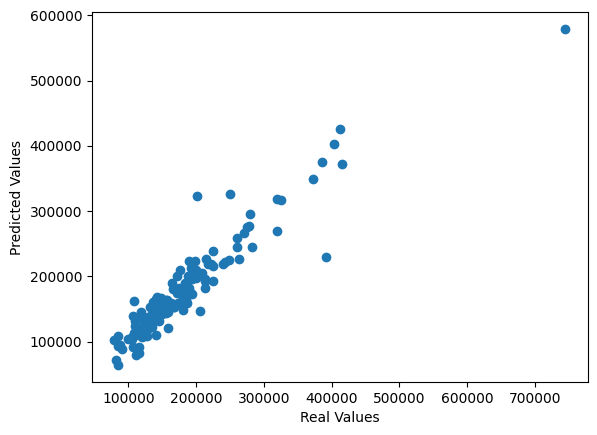

In [ ]:
# Lets plot prediction VS real values

plt.scatter(y_test, y_test_pred)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')

<font face='comic sans ms'>Except for few observations, actual and predicted values lies on the diagonal of the plot. Hence, our model performed good.

<Axes: >

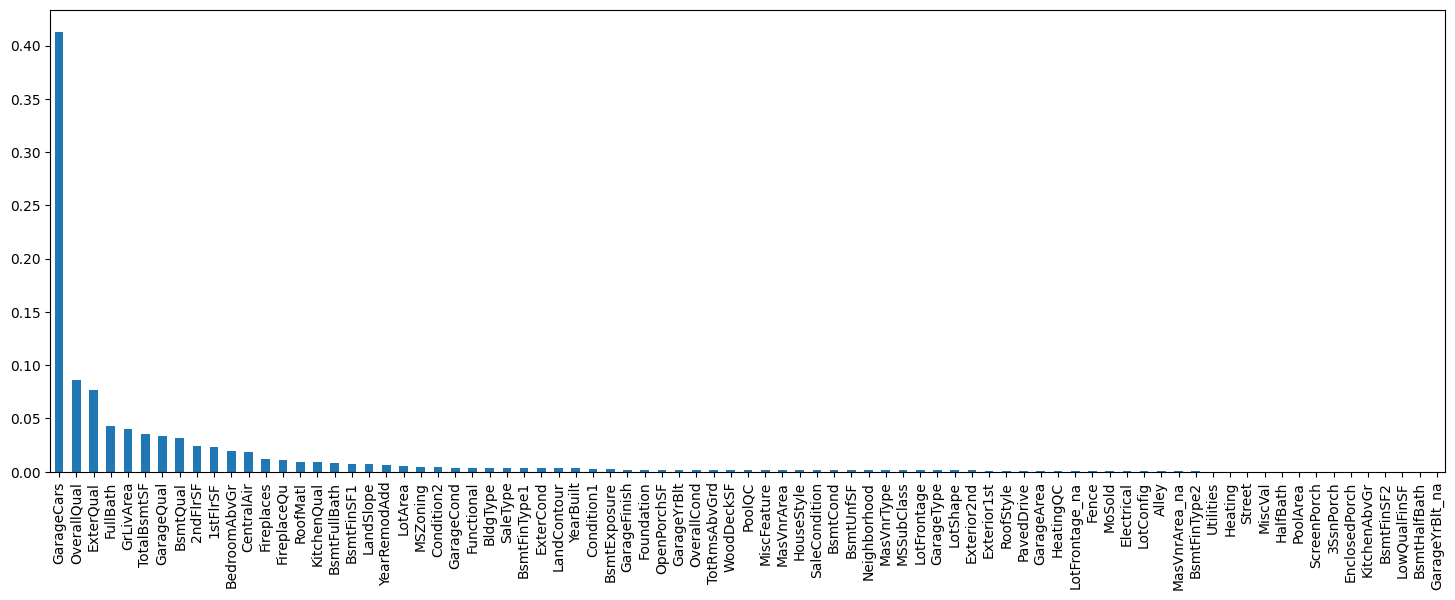

In [ ]:
# Lets plot Feature Importance

importance = pd.Series(grid_search.best_estimator_.named_steps.regressor.feature_importances_).abs()
importance.index = list(final_columns)+['LotFrontage_na', 'MasVnrArea_na', 'GarageYrBlt_na']
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))

<font face='Comic Sans MS'>Following are <strong>top important features</strong>:



1.   GarageCars
2.   OverallQual
3.   ExterQual
4.   FullBath
5.   GrLivArea
6.   TotalBsmtSF
7.   GarageQual
8.   BsmtQual
9.   2ndFlrSF
10.  1stFlrSF



In [ ]:
# Create pandas dataframe for submission 

submission_data = pd.DataFrame({
    'Id': ids,
    'SalePrice': y_pred
})

In [ ]:
# lets overview submission file

submission_data.tail()

Id      SalePrice
1454  2915   88271.585938
1455  2916   81669.226562
1456  2917  154773.078125
1457  2918  116947.914062
1458  2919  252461.156250

In [ ]:
submission_data.to_csv("/content/drive/MyDrive/My folder/udemy/Projects to skill up FE/submission_file.csv", index=False)